# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет (файл real_estate_data.csv).\
Необходимо научиться определять рыночную стоимость объектов недвижимости. 
Часть данных вписаны пользователем, остальные — получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма). 

<b>Наша задача</b>

Выявить основные параметры, что позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

<b>Ход исследования</b>
- Обзор данных
- Предобработка данных
- Добавление новых столбцов с параметрами для исследования
- Исследовательский анализ данных

<b>Описание данных</b>

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)\
balcony — число балконов\
ceiling_height — высота потолков (м)\
cityCenters_nearest — расстояние до центра города (м)\
days_exposition — сколько дней было размещено объявление (от публикации до снятия)\
first_day_exposition — дата публикации\
floor — этаж\
floors_total — всего этажей в доме\
is_apartment — апартаменты (булев тип)\
kitchen_area — площадь кухни в квадратных метрах (м²)\
last_price — цена на момент снятия с публикации\
living_area — жилая площадь в квадратных метрах (м²)\
locality_name — название населённого пункта\
open_plan — свободная планировка (булев тип)\
parks_around3000 — число парков в радиусе 3 км\
parks_nearest — расстояние до ближайшего парка (м)\
ponds_around3000 — число водоёмов в радиусе 3 км\
ponds_nearest — расстояние до ближайшего водоёма (м)\
rooms — число комнат\
studio — квартира-студия (булев тип)\
total_area — общая площадь квартиры в квадратных метрах (м²)\
total_images — число фотографий квартиры в объявлении

## Обзор данных

In [1]:
#импорт библиотеки pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#откроем таблицу и сохраним данных в новой переменной data
try:
    data= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv(r'C:\Users\Irina\Desktop\Analitic_projects\datasets\real_estate_data.csv', sep='\t')

#посмотрим основные данных датафрейма
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#посмотрим как выглядят 10 первых строк таблицы
data.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


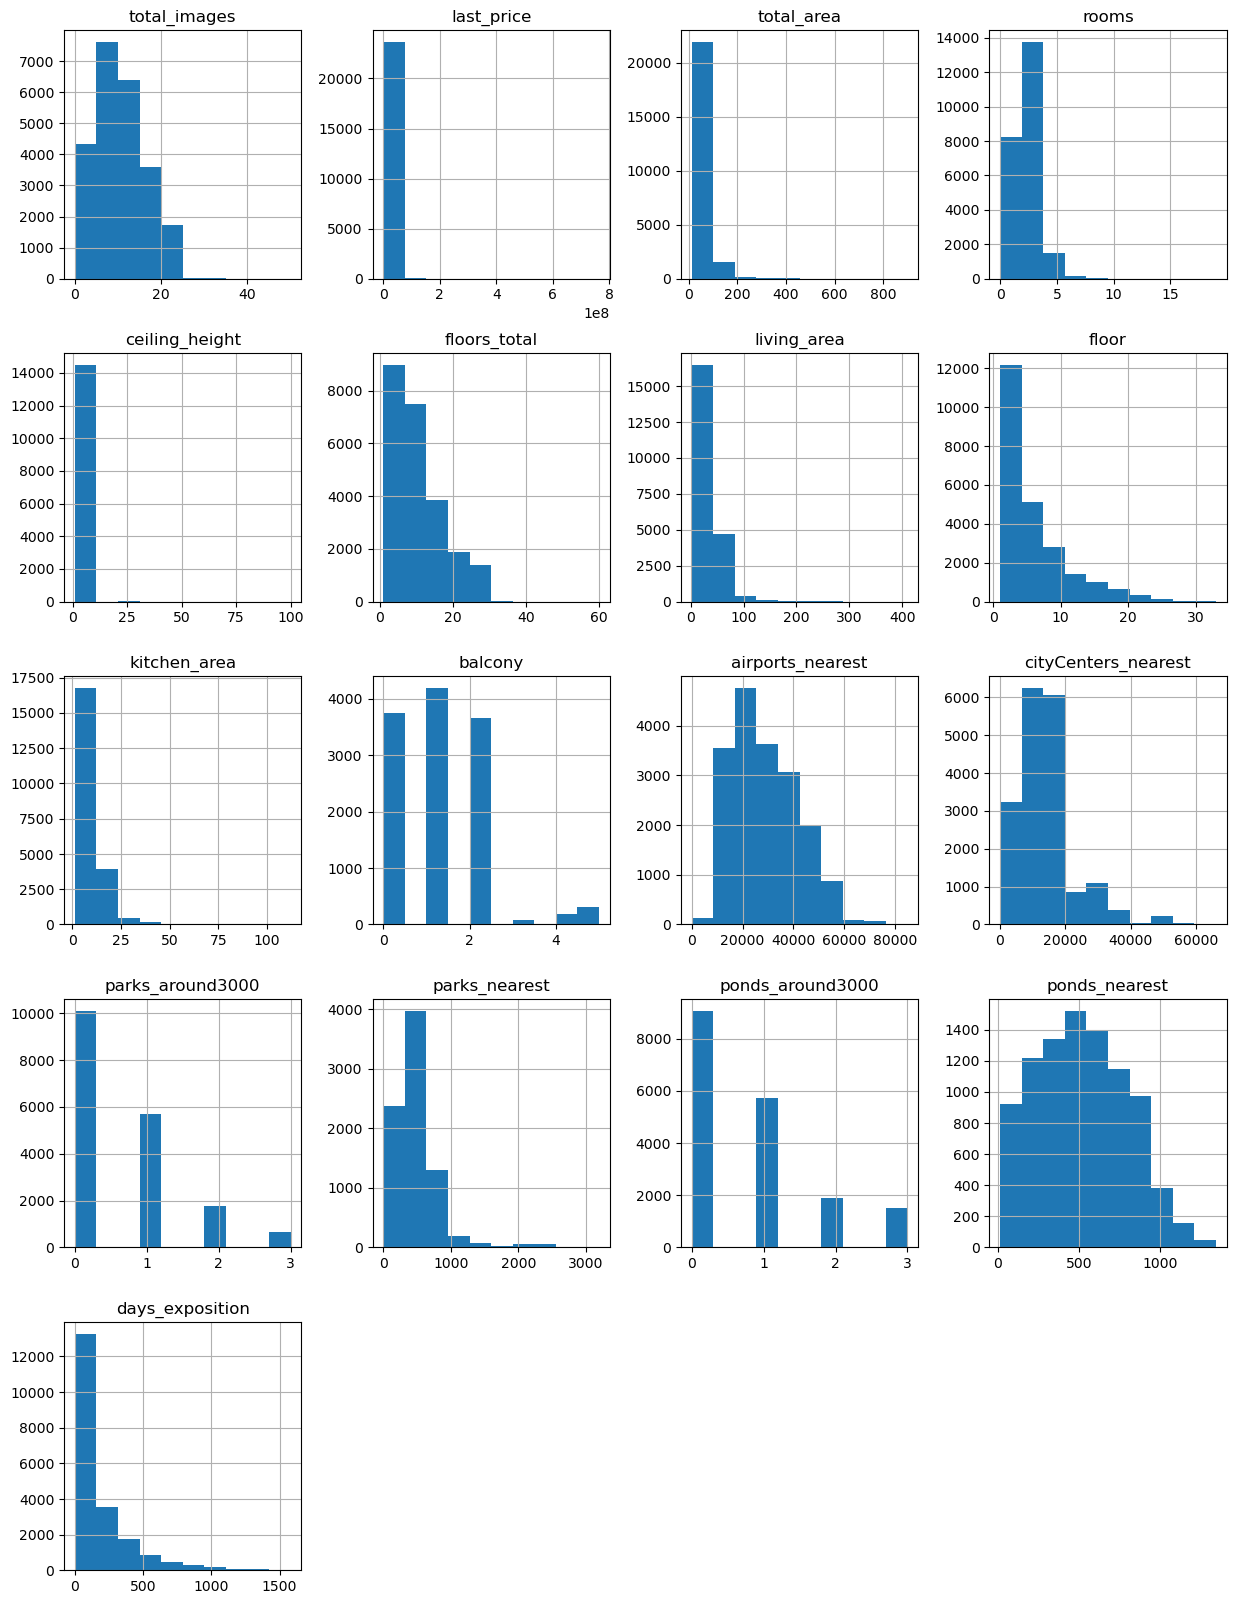

In [4]:
#строим гистограммы для всего датафрейма
data.hist(figsize=(15, 20)); 

Просмотрев все гистограммы видим, что получились вполне реальные ожидаемые значения. Сильных аномальных всплексов на первый взгляд невидно. Также распределения стремятся или к нормальному, или к распред Пуассона.

## Предобработка данных

### Работа с пропусками

In [5]:
#определяем в каких столбцах есть пропуски и их количество
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим довольно большое количество пропусков в некоторых столбцах. Будем их обрабатывать поэтапно.

В столбце балконы есть пропуски. Будем учитывать, что в строках, где балкон не указано значение отсутствует балкон и заменим это значение на 0.

In [6]:
#заменяем все Nan на 0. считаем что в этих квартирах нет балконов
data['balcony'] = data['balcony'].fillna(0) 

Не все так просто с площадью жилой и кухни. Часть значений не указано. \
Это связано скорее всего с тем, что для платформы(сайта) это значение не обязательно и часть людей их поэтому не заполняли. 
   

In [7]:
#проверим есть ли неправдоподобные значения по площади и какое их количество
data.query('living_area + kitchen_area > total_area')['last_price'].count()

64

Посмотрим есть ли неправдоподобные значения. Сумма площади кухни и жилой площади не может быть больше общей. Таких строк всего 64, это не так много. Удалим некорректные строчки из датафрейма, чтобы не искажать дальнейший анализ.

In [8]:
#удалим строки из анализа, где living_area + kitchen_area > total_area (невозможные условия)
data = data[((data['living_area'] + data['kitchen_area']) <= data['total_area'])\
            | (data['living_area'].isna()) | (data['kitchen_area'].isna())]

#проверим удалились ли они
data.query('living_area + kitchen_area > total_area')['last_price'].count()

0

Пропуски заменять средним или медианным значением мы не будем, оставим эти данные как есть, чтобы сохранить как можно больше реальных данных.

In [9]:
#Посмотрим основные параметры по всему датафрейму. Сейчас нас больше всего интересуют квартили 25% и 75%, 
#чтобы понять в каких пределах лежит большинство значений
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23635.000000,2.363500e+04,23635.000000,23635.000000,14462.000000,23549.000000,21732.000000,23635.000000,21357.000000,23635.000000,18113.000000,18136.000000,18137.000000,8061.000000,18137.000000,9092.000000,20462.000000
mean,9.857542,6.545409e+06,60.379893,2.071673,2.768160,10.667842,34.439614,5.886905,10.557950,0.589846,28792.935792,14191.156815,0.611347,490.910185,0.770194,517.835020,180.956212
std,5.681958,1.090059e+07,35.685050,1.078979,1.229506,6.593115,22.045004,4.881756,5.892814,0.958740,12630.795490,8612.541487,0.801802,341.902692,0.937921,277.630081,219.792706
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.405500e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9234.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13094.000000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.250000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


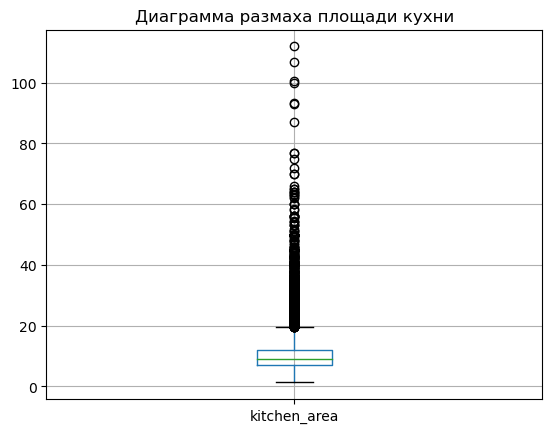

In [10]:
#строим диаграмму размаха для столбца площадь кухни, чтобы посмотреть насколько много выбросов 
data.boxplot(column='kitchen_area')
plt.title('Диаграмма размаха площади кухни')
plt.show();

При анализе данных не будем учитывать слишком большие выбросы. Проведем анализ на основе среднестатистических данных, убирая как можно больше выбросов и не учитывая слишком элитную недвижимость, которая может исказить среднестатистич результаты.

По площади кухни Q1=7, Q3=12. Довольно близкие значения между собой. Межквартильный размах всего лишь 5 м2. Ящик с усами в промежутке 0-20 кв м . Это похоже на правду. 
Единственное, взяла бы с запасом промежуток больших значений до 30 кв.м., посколько бывают ситуации, когда кухня и гостиная объеденены и эту площадь приписывают к кухне. 30 кв.м. будет вполне достаточно. Значения, которые выше считаем выбросами и отбрасываем их из анализа (создаем новую переменную,  сохранив исходный датафрейм).

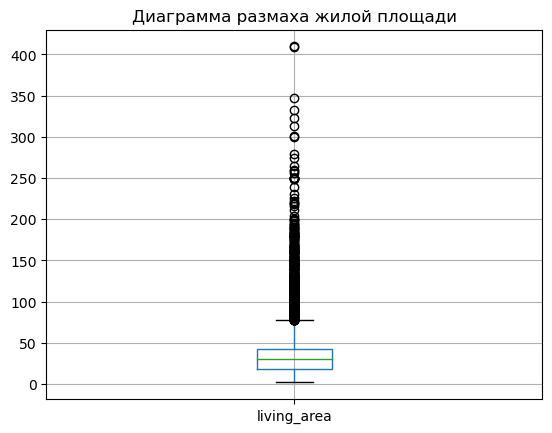

In [11]:
#строим диаграмму размаха для столбца жилой площади
data.boxplot(column='living_area')
plt.title('Диаграмма размаха жилой площади')
plt.show();

Аналогично поступаем и со столбцом жилой площади, ящик с усами в промежутке - 0 - 75 кв.м.
Отбросим значения больше 80 кв.м.

In [12]:
#делаем срез данных, чтобы исключить большие значения из анализа
 
data = data.loc[(data['living_area'] < 80) | (data['living_area'].isna())]
data = data.loc[(data['kitchen_area'] < 30) | (data['kitchen_area'].isna())]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22650 non-null  int64  
 1   last_price            22650 non-null  float64
 2   total_area            22650 non-null  float64
 3   first_day_exposition  22650 non-null  object 
 4   rooms                 22650 non-null  int64  
 5   ceiling_height        13765 non-null  float64
 6   floors_total          22567 non-null  float64
 7   living_area           20769 non-null  float64
 8   floor                 22650 non-null  int64  
 9   is_apartment          2629 non-null   object 
 10  studio                22650 non-null  bool   
 11  open_plan             22650 non-null  bool   
 12  kitchen_area          20400 non-null  float64
 13  balcony               22650 non-null  float64
 14  locality_name         22603 non-null  object 
 15  airports_nearest   

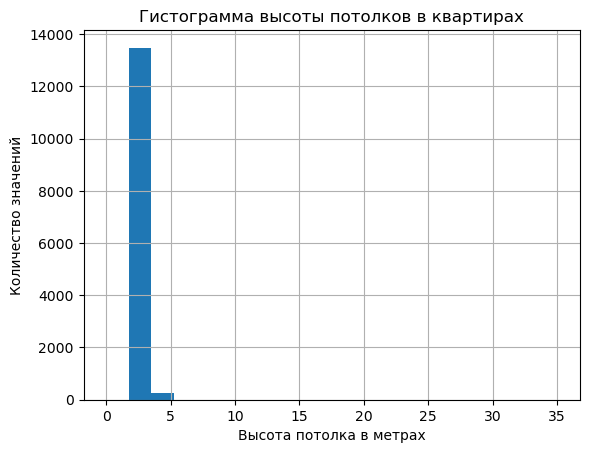

In [13]:
# строим гистограмму для высоты потолков, чтобы посмотреть какие значения преобладают
data['ceiling_height'].hist(bins=20, range=(0, 35))
plt.xlabel('Высота потолка в метрах')
plt.ylabel('Количество значений')
plt.title('Гистограмма высоты потолков в квартирах')
plt.show();

In [14]:
# выведем на экран количество строк, в которых высота потолков превышает 5 м (невозможные значения)
print(data.query('ceiling_height > 5')['last_price'].count())

30


Исследуем подробнее столбец ceiling_height (высота потолков). Первым делом скорректируем аномальные значения в этом столбце.
Логично предположить, что высота потолка не может превышать 5 м. Проверим есть ли значения, которые превышают это значение. Оказалось, что такие данные есть - 30 строк, хотя на гистограмме эти значения не видны ввиду их малого количества.
Такие данные неправдоподобны и можно сделать предположение, что неверно поставили разряд числа, вместо 2,5 метра написали 25 м. Исправим значения этих строк, разделив их на 10.

In [15]:
#поделим аномально большие значение на 10
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] =  data['ceiling_height'] / 10 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22650 non-null  int64  
 1   last_price            22650 non-null  float64
 2   total_area            22650 non-null  float64
 3   first_day_exposition  22650 non-null  object 
 4   rooms                 22650 non-null  int64  
 5   ceiling_height        13765 non-null  float64
 6   floors_total          22567 non-null  float64
 7   living_area           20769 non-null  float64
 8   floor                 22650 non-null  int64  
 9   is_apartment          2629 non-null   object 
 10  studio                22650 non-null  bool   
 11  open_plan             22650 non-null  bool   
 12  kitchen_area          20400 non-null  float64
 13  balcony               22650 non-null  float64
 14  locality_name         22603 non-null  object 
 15  airports_nearest   

Вводим условие, что реальная высота потолков может колебаться в пределах от 2,5 метров до 5 метров. Проверим сколько значений не удовлетворяет этому условию.

In [16]:
#определим количество строк, в которых значение ceiling_height < 2.5 или ceiling_height > 5 (аномальные)
print(data.query('ceiling_height < 2.5 or ceiling_height > 5')['last_price'].count())

#исключим аномальные значения, оставив высоту потолка в пределах [2.5, 5]
data = data[(data['ceiling_height'].isna()) | ((data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 5))]

86


86 строк - удалим эти строки из анализа.

Пропусков значений высоты потолков слишком много, больше 30%, поэтому нерезонно заменять их медианных значением, иначе мы потеряем достоверность данных. Оставим их как есть. 

In [17]:
#проверим сколько значений у нас осталось в исходном датафрейме
data.shape[0]

22564

In [18]:
#проверим сколько пропусков у нас осталось в исходном датафрейме и в каких они столбцах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8885
floors_total               83
living_area              1873
floor                       0
is_apartment            19950
studio                      0
open_plan                   0
kitchen_area             2238
balcony                     0
locality_name              47
airports_nearest         5451
cityCenters_nearest      5431
parks_around3000         5430
parks_nearest           15162
ponds_around3000         5430
ponds_nearest           14143
days_exposition          2918
dtype: int64

Остальные столбцы с пропусками нет смысла трогать. Отсутствующие значения Nan в days_exposition вообще даже дает нам доп информацию о том, что обьявление еще актуально и квартира еще продается.

Пропуски в значениях в оставшихся столбах связаны скорее всего с незначительностью сведений и являются необязательными для заполнения. 
Количество незаполненных данных в последних столбцах слишком большое (20-70% от общего числа данных). Поэтому нет смысла их заменять медианным значением, это сильно исказит картину. Они не сыграют роли для дальнейшего нашего анализа.

В случае, если эти данные нам потребуются в анализе, то мы от них избавимся от пропусков в процессе анализа. На этапе предобработки я бы их не трогала.

### Удаление дубликатов

Теперь займемся изучением уникальных значений в столбце с названиями locality_name и исправим явные и неявные дубликаты. 

In [19]:
print(len(data['locality_name'].unique()))
print(data['locality_name'].unique())

364
['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня Оржиц

In [20]:
#проверим нет ли явных дубликатов в датафрейме
print('Количество явных дубликатов', data.duplicated().sum())

#обновим постепенно столбец locality_name: уберем верхний регистр, заменим буквы и определенные слова на поселок
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('деревня', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной', '')
print('Количество уникальных значений', len(data['locality_name'].unique()))


Количество явных дубликатов 0
Количество уникальных значений 316


Путем замены некоторых слов мы добились сокращения количества уникальных значений с 364 до 316.

### Замена типов данных

In [21]:
#Проверим какие типы данных присутствуют в каждом столбце
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22564 non-null  int64  
 1   last_price            22564 non-null  float64
 2   total_area            22564 non-null  float64
 3   first_day_exposition  22564 non-null  object 
 4   rooms                 22564 non-null  int64  
 5   ceiling_height        13679 non-null  float64
 6   floors_total          22481 non-null  float64
 7   living_area           20691 non-null  float64
 8   floor                 22564 non-null  int64  
 9   is_apartment          2614 non-null   object 
 10  studio                22564 non-null  bool   
 11  open_plan             22564 non-null  bool   
 12  kitchen_area          20326 non-null  float64
 13  balcony               22564 non-null  float64
 14  locality_name         22517 non-null  object 
 15  airports_nearest   

'Floors_total' не может быть вещественным числом. Число этажей в доме может быть только целым. 
Поэтому тип данных у текущего столбца необходимо перевести.

В столбце floors_total есть 86 пропусков, которые никак нельзя предугадать. 
И поскольку этих пропуском малая часть по сравнению со всем массивом данных, 
то можно удалить строки с пропусками для того, чтобы перевести столбец к целочистенному значению.

Аналогичная ситуация со столбцами  balcony и days_exposition.
balcony без проблем переведем в int64.
А вот у столбца days_exposition большое кол-во строк с пропусками, причем эти пропуски для нас важны и их большое кол-во. 
Поэтому столбец days_exposition оставим без изменений с типом float64.


In [22]:
#удалим строки, где встречаются пропуски в столбце floors_total
data = data.dropna(subset=['floors_total'])

#переведем тип данных float64 в int64 у столбцов floors_total, balcony и days_exposition
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

#переведем столбец first_day_exposition в формат даты и времени
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#проверим как преобразовался столбец first_day_exposition
print(data['first_day_exposition'].head(10))

#проверим как преобразовались наши измененные столбцы в int
data.info()


0    2019-03-07
1    2018-12-04
2    2015-08-20
3    2015-07-24
5    2018-09-10
6    2017-11-02
7    2019-04-18
8    2018-05-23
9    2017-02-26
10   2017-11-16
Name: first_day_exposition, dtype: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22481 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22481 non-null  int64         
 1   last_price            22481 non-null  float64       
 2   total_area            22481 non-null  float64       
 3   first_day_exposition  22481 non-null  datetime64[ns]
 4   rooms                 22481 non-null  int64         
 5   ceiling_height        13671 non-null  float64       
 6   floors_total          22481 non-null  int32         
 7   living_area           20641 non-null  float64       
 8   floor                 22481 non-null  int64         
 9   is_apartment          2614 non-null   

Успешно провели замену типов данных, теперь все столбцы корректно отображаются.

### Устранение редких и выбивающихся значений

Займемся удалением редких аномальных значений.

Будем работать со столбцами:
'rooms', 'total_area', 'days_exposition', 'last_price', 'floor', 'floors_total'

Столбцы 'ceiling_height', 'living_area', 'kitchen_area' мы уже обработали на этапе предобработки.

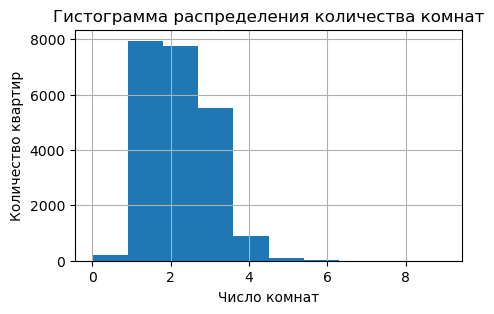

In [23]:
#строим гистограмму зависимости от количества комнат
data.hist('rooms', figsize=(5, 3))
plt.xlabel('Число комнат')
plt.ylabel('Количество квартир')
plt.title('Гистограмма распределения количества комнат')
plt.show();

Больше 7 комнат редкость, поэтому отбросим их. 

In [24]:
#Придерживаемся правила - их не то чтобы не бывает, бывает, но очень редко, поэтому мы их не учитываем при исследовании
data = data[(data['rooms'] <= 7)]
data.shape[0]

22480

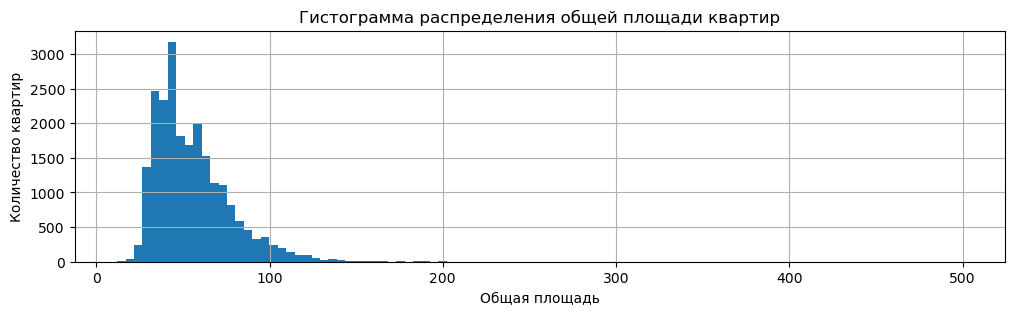

In [25]:
#строим гистограмму зависимости от общей площади
data.hist('total_area', bins=100, figsize=(12, 3))
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.title('Гистограмма распределения общей площади квартир')
plt.show();

In [26]:
#отбрасываем значения: меньше 20 и больше 250 кв м по общей площади 
data = data[(data['total_area'] >= 20) & (data['total_area'] <= 250)]
data.shape[0]

22439

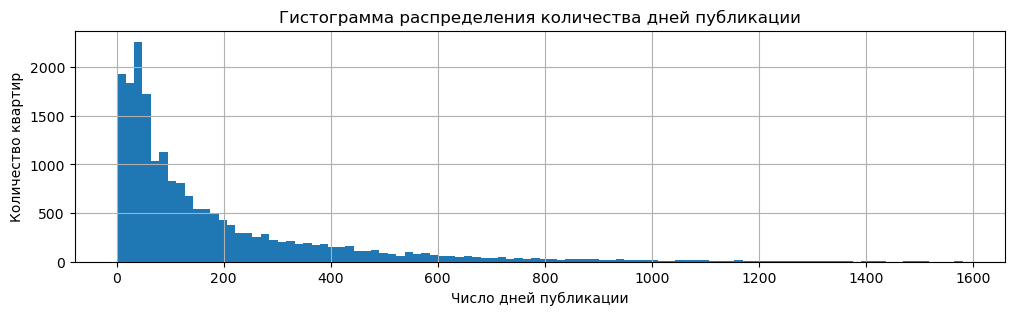

In [27]:
#строим гистограмму зависимости от кол-ва дней публикации
data.hist('days_exposition', bins=100, figsize=(12, 3))
plt.xlabel('Число дней публикации')
plt.ylabel('Количество квартир')
plt.title('Гистограмма распределения количества дней публикации')
plt.show();

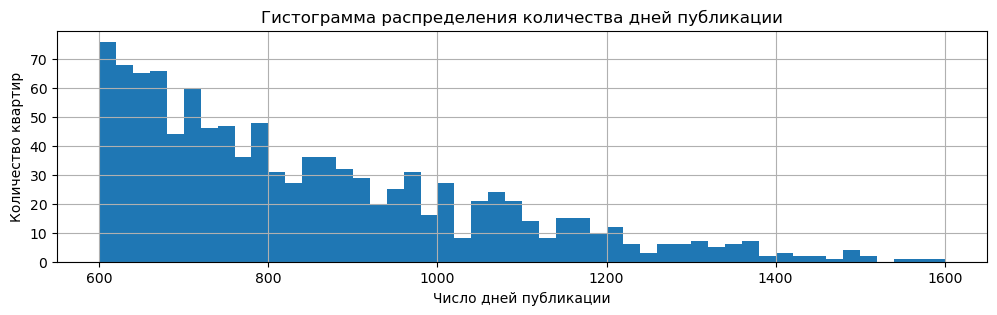

In [28]:
# укрупняем масштаб
data.hist('days_exposition', bins=50, figsize=(12, 3), range=(600, 1600))
plt.xlabel('Число дней публикации')
plt.ylabel('Количество квартир')
plt.title('Гистограмма распределения количества дней публикации')
plt.show();

In [29]:
#отбрасываем значения больше 1200 дней публикации 
data = data[(data['days_exposition'] < 1200) | (data['days_exposition'].isna())]
data.shape[0]

22362

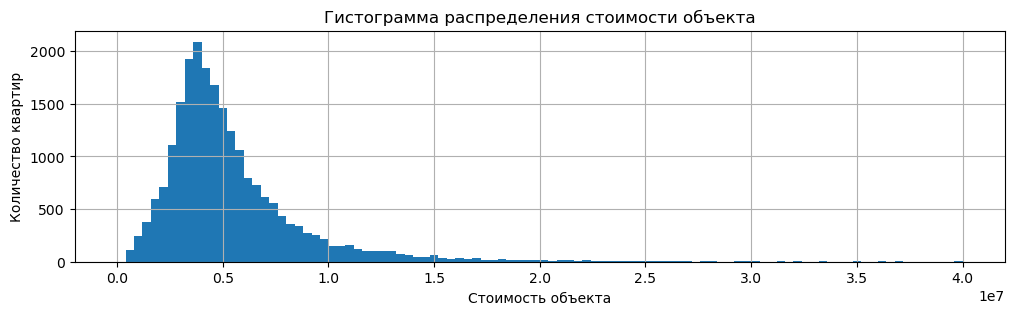

In [30]:
#строим гистограмму зависимости от стоимости объекта
data.hist('last_price', bins=100, figsize=(12, 3), range=(0, 40000000))
plt.xlabel('Стоимость объекта')
plt.ylabel('Количество квартир')
plt.title('Гистограмма распределения стоимости объекта')
plt.show();

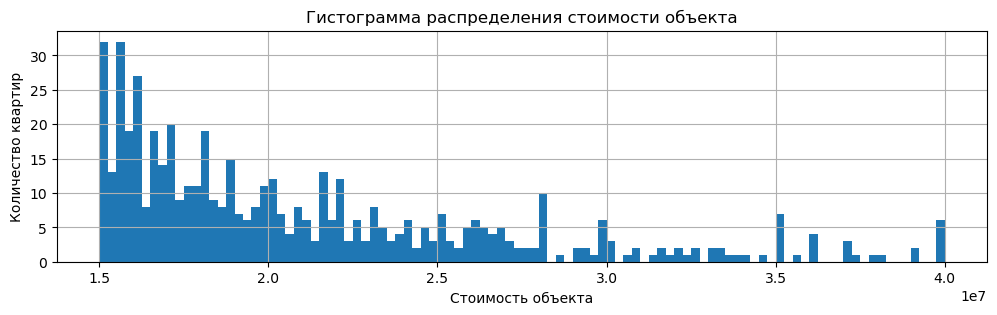

In [31]:
# укрупненный масштаб
data.hist('last_price', bins=100, figsize=(12, 3), range=(15000000, 40000000))
plt.xlabel('Стоимость объекта')
plt.ylabel('Количество квартир')
plt.title('Гистограмма распределения стоимости объекта')
plt.show();

In [32]:
#отбрасываем значения со стоимостью более 22 млн рублей.
#Поскольку таких объявлений не много не более 10 штук на каждую стоимость. 
#Это уже считается более элитным жильем, его не будем учитывать при анализе.
data = data[(data['last_price'] < 22000000) | (data['last_price'].isna())]
data.shape[0]

22157

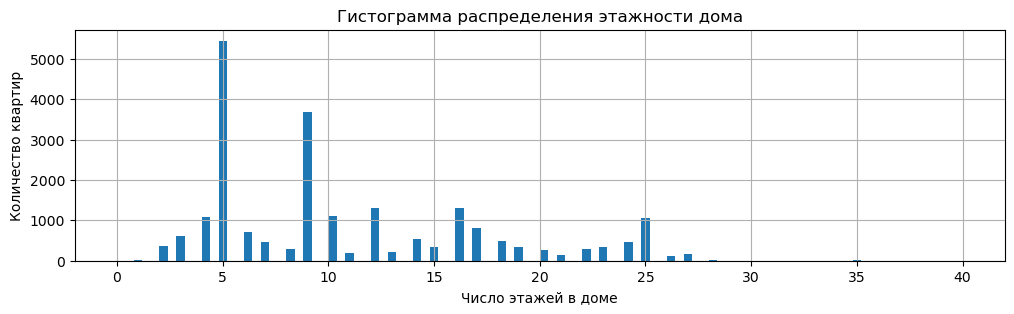

In [33]:
#строим гистограмму зависимости от этажности дома
data.hist('floors_total', bins=100, figsize=(12, 3), range=(0, 40))
plt.xlabel('Число этажей в доме')
plt.ylabel('Количество квартир')
plt.title('Гистограмма распределения этажности дома')
plt.show();

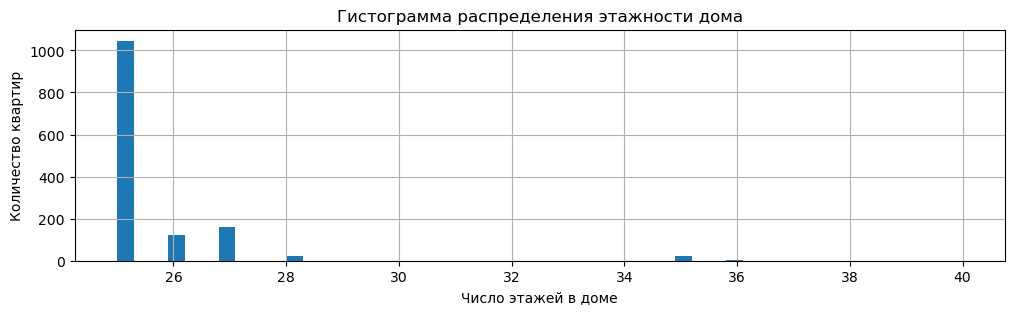

In [34]:
#строим гистограмму зависимости от этажности дома
data.hist('floors_total', bins=50, figsize=(12, 3), range=(25, 40))
plt.xlabel('Число этажей в доме')
plt.ylabel('Количество квартир')
plt.title('Гистограмма распределения этажности дома')
plt.show();

In [35]:
#отбрасываем значения больше 27 этажей 
data = data[(data['floors_total'] < 28) | (data['floors_total'].isna())]
data.shape[0]

22105

### Посчет и добавление в таблицу новых столбцов

Займемся добавлением новых столбцов в датафрейм.

In [36]:
#добавим новый столбец определения дня недели в публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#добавим столбец год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

#добавим столбец месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,year_exposition,month_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,2019,3
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1,2018,12
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,3,2015,8
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0,2018,9
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,3,2017,11
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,3,2019,4
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,2,2018,5
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,6,2017,2
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,NaN,...,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,3,2017,11
11,9,3300000.0,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,0,2018,8


In [37]:
#добавим столбец с ценой объявления на 1 квадратный метр 
data['price_one_m2'] = data['last_price'] / data['total_area']

#округлим значения до целых чисел
data['price_one_m2'] = data['price_one_m2'].astype('int')
data['price_one_m2'].head(10)

0     120370
1      82920
2      92785
5      95065
6      99195
7     110544
8      87454
9      88524
10    127525
11     75000
Name: price_one_m2, dtype: int32

In [38]:
#создадим функцию, которая будет разделять на категории по типу этажа
def floor_types(row):
    fl = row['floor']
    fl2 = row['floors_total']
    if fl == 1:
        return 'первый'
    if fl == row['floors_total']:
        return 'последний'
    if fl <= 0:
        return 'аномалия'
    else:
        return 'другой'

#добавим новый столбец, который применит функцию к строчкам датафрейма   
data['floor_type'] = data.apply(floor_types, axis=1) 

#выведем на экран распределение по этажам
data['floor_type'].value_counts() 

другой       16259
последний     3047
первый        2799
Name: floor_type, dtype: int64

In [39]:
data['floor'].describe()

count    22105.000000
mean         5.887175
std          4.869797
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [40]:
#создадим новый столбец со значениями cityCenters_nearest, переведенными из м в км
data['city_centr_km'] = data['cityCenters_nearest'] / 1000

#выведем на экран для сравнения первые 10 строк обоих столбцов
print(data['cityCenters_nearest'].head(10))
print(data['city_centr_km'].head(10))
data['city_centr_km'].isna().sum()

0     16028.0
1     18603.0
2     13933.0
5         NaN
6     19143.0
7     11634.0
8         NaN
9     15008.0
10    13878.0
11    51677.0
Name: cityCenters_nearest, dtype: float64
0     16.028
1     18.603
2     13.933
5        NaN
6     19.143
7     11.634
8        NaN
9     15.008
10    13.878
11    51.677
Name: city_centr_km, dtype: float64


5391

В созданном столбце есть 5391 пропуск со значением Nan. Поскольку этот столбец нужно привести к целочисленным значениям, то нам необходимо избавиться от Nan (переводим все в int) 
или 2 способ:
просто округлить все значения, оставив Nan (round).
Предпочту на данном этапе анализа сохранить наши значения Nan, дабы не сместились наши показатели при расчетах.

In [41]:
data['city_centr_km'] = round(data['city_centr_km'])
data['city_centr_km'].head(10)

0     16.0
1     19.0
2     14.0
5      NaN
6     19.0
7     12.0
8      NaN
9     15.0
10    14.0
11    52.0
Name: city_centr_km, dtype: float64

Итак, мы успешно добавили дополнительные столбцы для проведения исследовательского анализа данных, чем дальше и займемся.

## Проведение исследовательского анализа данных

### Анализ каждого столбца из датафрейма по отдельности

In [42]:
#отсортируем столбец total_area для понимания диапазона значений
print(data['total_area'].sort_values())

16991     20.00
4077      20.00
17860     20.00
21419     20.00
19477     20.00
          ...  
2462     201.50
2003     215.00
7399     230.00
6107     236.00
19964    238.26
Name: total_area, Length: 22105, dtype: float64


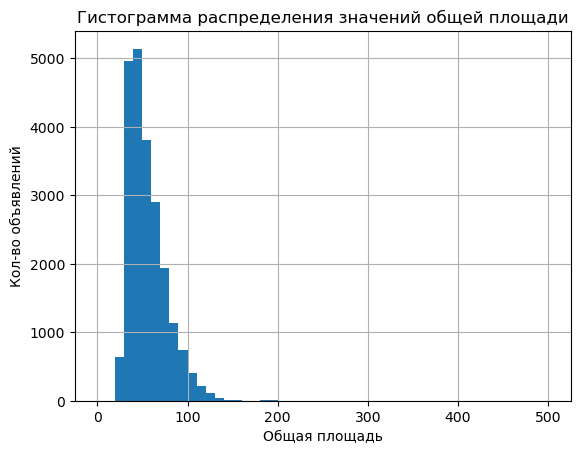

In [43]:
#построим гистограмму распределения значений общей площади квартир
data['total_area']\
.plot(kind='hist', title='Гистограмма распределения значений общей площади', range=(0, 500), bins=50, grid=True)
plt.xlabel('Общая площадь')
plt.ylabel('Кол-во объявлений')
plt.show();

График общей площади предсказуем и схож с нормальным распределением, при больших значениях имеет 
плавный хвост стремящийся к нулю.

Максимум приходится на площадь примерно 50-60 кв м. и это около 5000 квартир, 
что составляет около 22% от всех квартир из анализа.
Основная масса квартир находится в диапозоне 20-100 кв. м, что соответствует действительности.


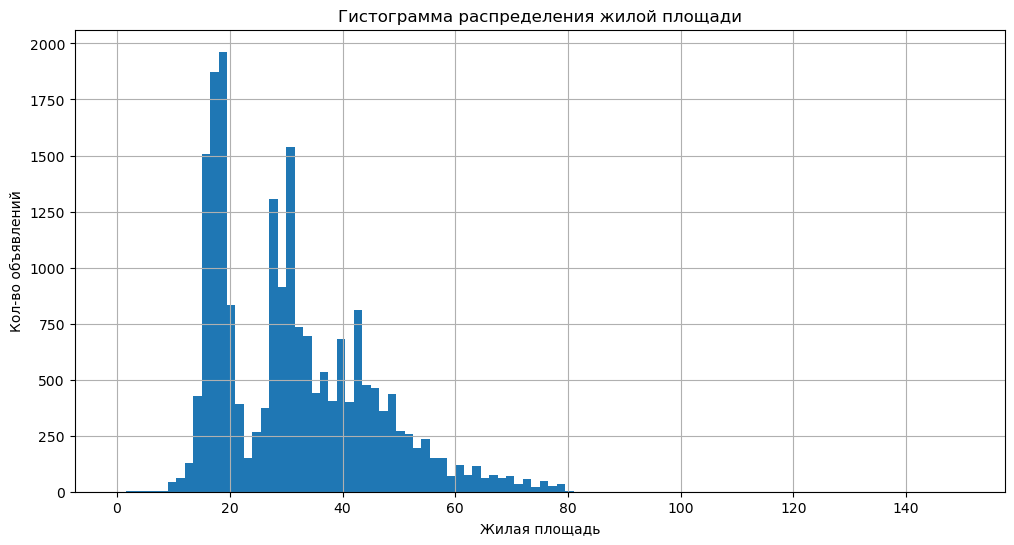

In [44]:
#построим гистрограмму распределения от жилой площади
data['living_area']\
.plot(kind='hist', title='Гистограмма распределения жилой площади', range=(0, 150), bins=100, grid=True, figsize=(12,6))
plt.xlabel('Жилая площадь')
plt.ylabel('Кол-во объявлений')
plt.show();

На гистограмме сразу обращает на себя внимание 2 пика.
Это не похоже на какую-то аномальность. При детальном рассмотрении можно заметить, что минимум между двумя максимумами
находится при жилой площади примерно 25 кв. м.
Скорее всего это евро-планировки, где кухня и жилая зона объеденены в одно пространство, и учитываются лишь в площади кухни 
(проверим гипотезу на след графике), а жилая за счет этого резко снижаемся.
И это кстати, скорее всего прибавляет количество к первому максимуму, который приходится на 20 кв. м. 
( студии, которые не могут быть в принципе без жилой).
этот пик также связан с тем, что в продаже чаще встречаются квартиры меньшей площади - студии и однушки.

Второй пик идет при жилой площади примерно 35 кв м. Это свойственно для двухкомнатных квартирах. 
Видно, что их чуть меньше. но средний пик все же отмечается.
Проверим эту гипотезу при построении гистограммы по количеству комнат.

Основная масса квартир состредоточена в промежутке 20-50 кв. м жилой площади. 

In [45]:
#отсортируем столбец kitchen_area для понимания диапазона значений
print(data['kitchen_area'].sort_values())

20217    1.3
16367    2.0
6262     2.0
9138     2.0
906      2.0
        ... 
23655    NaN
23663    NaN
23670    NaN
23679    NaN
23696    NaN
Name: kitchen_area, Length: 22105, dtype: float64


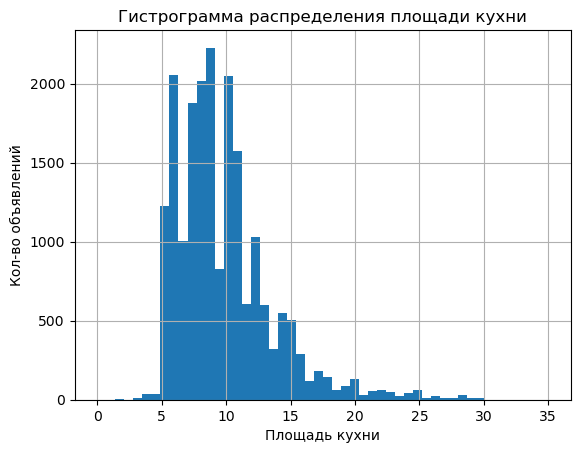

In [46]:
#построим гистрограмму распределения от площади кухни
data['kitchen_area'].hist(bins=50, range=(0, 35))
plt.title('Гистрограмма распределения площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Кол-во объявлений')
plt.show();

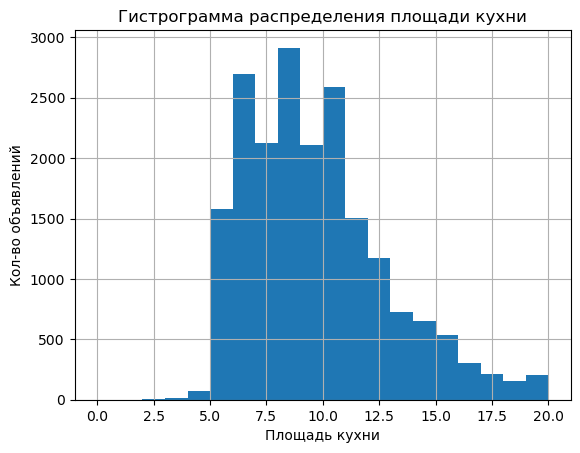

In [47]:
#построим более детальную гистрограмму распределения от площади кухни
data['kitchen_area'].hist(bins=20, range=(0, 20))
plt.title('Гистрограмма распределения площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Кол-во объявлений')
plt.show();

В данном примере посчитала нужным указать сразу несколько гистограм, я поигралась с разными параметрами корзин и диапазона, 
но при разных значениях я все же вижу 3 основных пика.

Основная площадь кухонь варируется в пределах от 5 до 20 кв м, что соответствует действительности.

Рассмотрим 3 пика подробнее.
все 3 пика имеют значение около 3000 квартир. 
Можно предположить почему прослеживаются именно 3 пика, а не это сходится в единый пик:
В разные годы постройки домов строили типовые квартиры и планировки, и там площадь кухонь была определенного значения. 
Также в Питере много старых домой 60-80 годв постройки, в то время кухни были всегда маленькие. 

1 пик - значение 5,5-6 кв м. - старые панельки 9 этажные. 
Их в Питере очень много и действительно площадь кухни именно такого размера.

2 пик - значение 8-9 кв м - их  самое большое кличество. - средний размер кухни для Питера. 
Также больше пресущ для старых домов корабли, панельки, общежития из кирпича, старый фонд.

3 пик - значение 10-11 кв м. - это уже кухни в более современных квартирах. 

Далее видна зависимость - чем больше площадь кухни (от 11 кв м ), тем меньшее количество объявлений.

In [48]:
#отсортируем столбец last_price для понимания диапазона значений
print(data['last_price'].sort_values())

17456      430000.0
14911      430000.0
16274      440000.0
16219      450000.0
9581       450000.0
            ...    
23240    21800000.0
22898    21821800.0
4476     21840000.0
19541    21990000.0
8162     21990000.0
Name: last_price, Length: 22105, dtype: float64


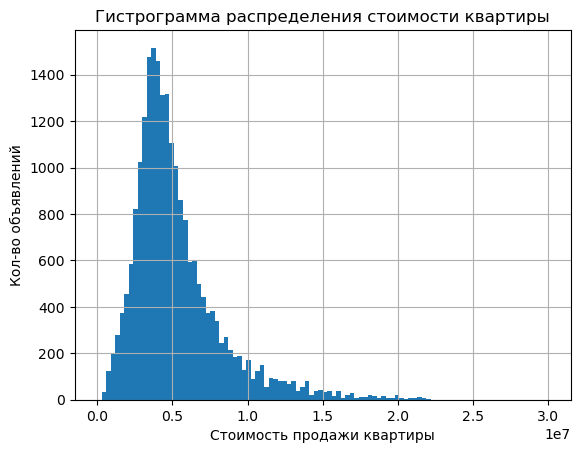

In [49]:
#построим гистрограмму распределения от стоимости продажи квартиры
data['last_price'].hist(bins=100, range=(0, 30000000))
plt.title('Гистрограмма распределения стоимости квартиры')
plt.xlabel('Стоимость продажи квартиры')
plt.ylabel('Кол-во объявлений')
plt.show();

График строим в диапазоне от 0 до 30 млн р. 
На графике виден отчетливо 1 пик при цене около 4 млн р.
Это средняя стоимость студий и однушек. 
И это логично, потому что однушек продается больше всего.

Основная масса стоимости на квартиры - в диапазоне от 2 до 8 млн р.

In [50]:
#отсортируем столбец rooms для понимания диапазона значений
print(data['rooms'].sort_values())

3019     0
4115     0
1260     0
6640     0
22053    0
        ..
23047    6
2709     6
14603    7
2462     7
23555    7
Name: rooms, Length: 22105, dtype: int64


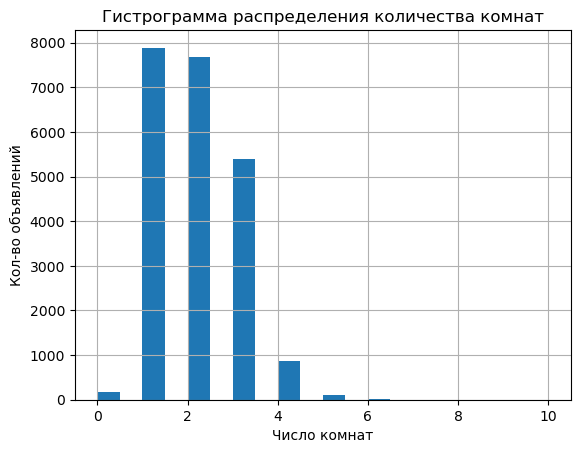

In [51]:
#построим гистрограмму распределения от количества комнат
data['rooms'].hist(bins=20, range=(0, 10))
plt.title('Гистрограмма распределения количества комнат')
plt.xlabel('Число комнат')
plt.ylabel('Кол-во объявлений')
plt.show();

Чаще всего продаются 3 вида квартир - 1-, 2- и 3-комнатные.
Как видим из графика - наибольшее количество квартир продаются однокомнатных и двухкомнатных. 
Причем их почти одинаковое кол-во. около 8000 объявлений (по 36% каждый).
Трехкомнатные также продаются, но чуть меньше (5000 квартир - 20%). 
Остальных вариантов квартир мало и они не превышают 1000 объявлений.

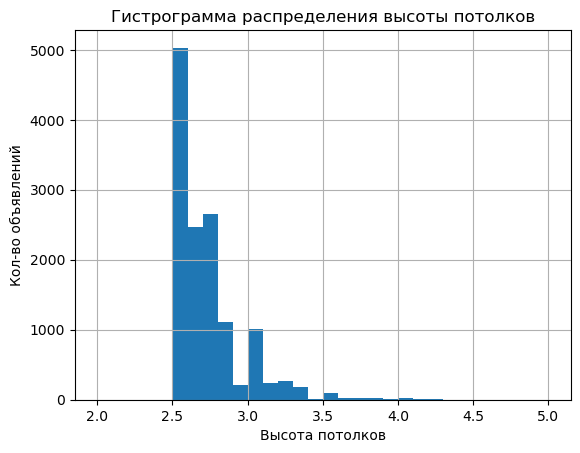

In [52]:
#построим гистрограмму распределения от высоты потолков
data['ceiling_height'].hist(bins=30, range=(2, 5))
plt.title('Гистрограмма распределения высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Кол-во объявлений')
plt.show();

Получился интересный график зависимости. Основной выбивающийся пик на значениях потолка - 2,6-2,7 м. На такую высоту приходится  почти 5000 объявлений- это 20% от общего числа.
Далее идет резкий спад числа объявлений, но видим небольшой всплеск на значениях 3,0-3,2 м. Такие объявления тоже есть - их около 1000. И это не ошибка. 
Действительно в Питере много домов старого фонда, где высота потолков около 3 метров.Получается, что это они и есть.

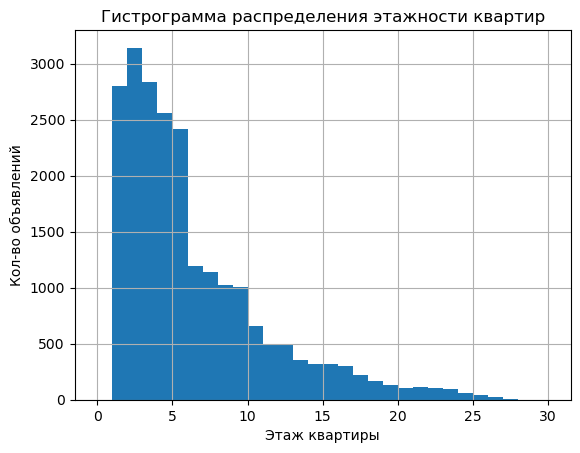

In [53]:
#построим гистрограмму зависимости от этажа квартиры
data['floor'].hist(bins=30, range=(0, 30))
plt.title('Гистрограмма распределения этажности квартир')
plt.xlabel('Этаж квартиры')
plt.ylabel('Кол-во объявлений')
plt.show();

Здесь отчетливо видно распределение Пуассона. 
Чем выше этаж квартиры, тем меньше объявлений.
Самое большое количество объявлений на 2 этаже - их около 3300. Это 7 % от общего числа обявлений.
Выбивается ряд значений, в которых число обявлений в разы больше:
с 1 по 5 этажи - от 2500 до 3300.
Начиная с 5 этажа, кол-во объявлений резко падает в 2 раза и их уже не больше 1300. Далее идет постепенный спад до 9 этажа. 
И начиная с 10 этажа число объявлений не превышает 600.

Это можно объяснить тем, что старые постройки домов были невысокие, некоторые только 2-этажные (их не так много). Было много кирпичных домов 5 этажных в советские времена.
А также панельки строились 9-этажными.
Поэтому и идет разбиение на эти 4 типа - 1-2, 1-5, 1-9, 1-27, т.е. присутствует немного ступеньчатый тип гистограммы.

Дома 10 и больше этажей - начали строить в большинстве своем после 90-х годов и их уже не там много.

Домов больше 27 этажей практически не строят, их незначительное количество, мы из в расчет для анализа не брали.

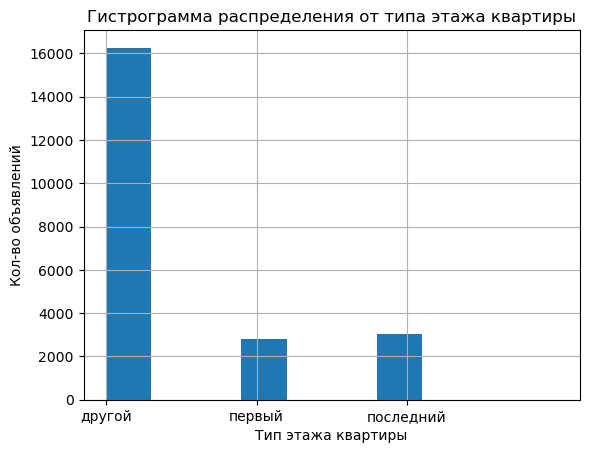

In [54]:
#построим гистрограмму зависимости от типа этажа квартиры
data['floor_type'].hist(bins=10, range=(0, 3))
plt.title('Гистрограмма распределения от типа этажа квартиры')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Кол-во объявлений')
plt.show();

Логично, что основная масса объявлений приходится на тип "другой". Таких объявлений больше 16000 - это более чем 72% от общего числа.
Первый и последний этаж поделили 2 и 3 место почти поровну, но все же на последнем этаже чуть больше объявлений.
последний - ~ 3000 объявлений, 13% от общего числа
первый - ~ 2700 объявлений, 12% от общего числа 

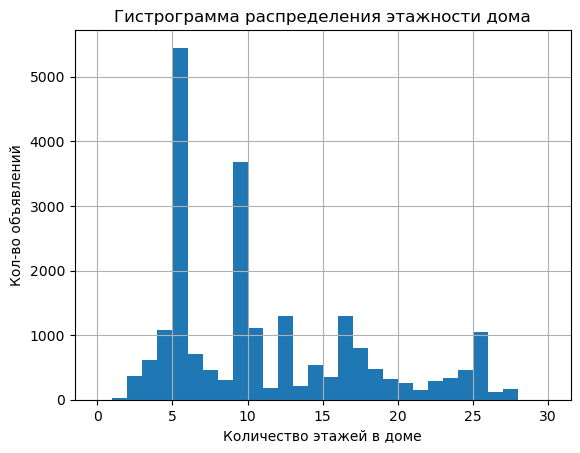

In [55]:
#построим гистрограмму зависимости от общего количества этажей в доме
data['floors_total'].hist(bins=30, range=(0, 30))
plt.title('Гистрограмма распределения этажности дома')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Кол-во объявлений')
plt.show();

Наша гипотеза относительно распределения по этажам (см график от этажа квартиры) подтверждается.
Есть четкие пики на значениях:
5, 9, 12, 16 и 25 этажей.
Именно такой высотности дома и построены по Питеру и области.

Больше всего объявлений по 5-этажным домам. Следом идут 9-этажные. Они распределелились по 5700 (25% четверть всех объявлений!) и 3700 (16%) объявлений соответственно.
С большей высотностью дома объявлений в разы меньше - от 1000 до 1300. Они все 3 вместе дают те же 15%.

Это все говорит о том, что основная застройка домов - 5 и 9 этажные.

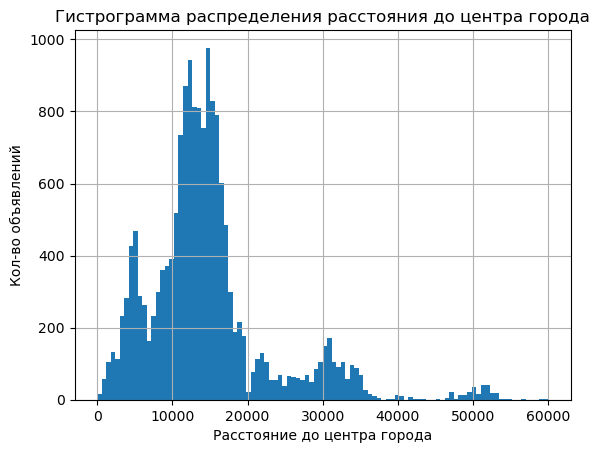

In [56]:
#построим гистрограмму зависимости от расстояния до центра города
data['cityCenters_nearest'].hist(bins=100, range=(0, 60000))
plt.title('Гистрограмма распределения расстояния до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Кол-во объявлений')
plt.show();

График явно имеет несколько пиков. Остановимся на них подробнее.
1 пик - 5000 м от центра (> 400 объявлений)
2 и 3 пик - 12 и 15 км от центра, по 1000 объявлений в каждом
4 пик - 22 км
5 пик - 30 км, и с 30 до 36 км достаточно объявлений
6 пик - 51 км, также есть объявления.

В основном объявления в промежутке от 0 до 20 км. Все что дальше - есть всплеки, о которых я уже указала, 
но таких объявлений не  много. 
По километражу это больше похоже на пригород.

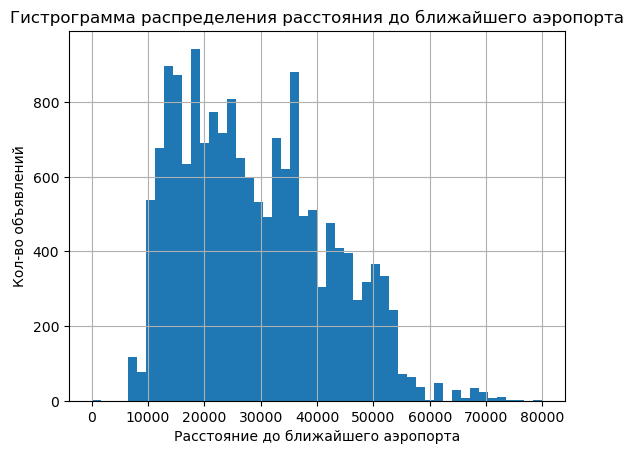

In [57]:
#построим гистрограмму зависимости до ближайшего аэропорта
data['airports_nearest'].hist(bins=50, range=(0, 80000))
plt.title('Гистрограмма распределения расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Кол-во объявлений')
plt.show();

По данному графику совсем большой разброс.
Большая часть объявлений из промежутка - 10-40 км. В них кол-во колеблется от 600 до 1000 объявлений. 
Также есть 2 часть от 40 до 55 км - и такие объявления встречаются реже - 300-450 объявлений.

Аэропорт в питере один и он находится на удалении. практически всем до него приходится добираться. И не прослеживается четкого пика в значениях.

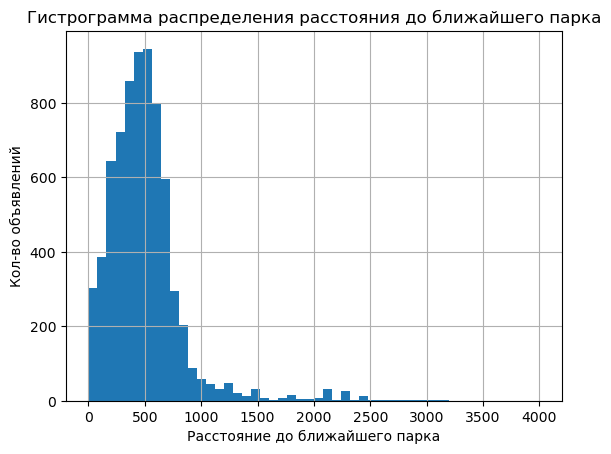

In [58]:
#построим гистрограмму зависимости до ближайшего парка
data['parks_nearest'].hist(bins=50, range=(0, 4000))
plt.title('Гистрограмма распределения расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Кол-во объявлений')
plt.show();

Гистограмма с ярко выраженным одним пиком - 500 метров до парка, кол-во объявлений здесь более 900 примерно.
Основная часть данных в промежутке от 0 до 800 м. 
Парков в Питере и окрестностях много, они рассредоточены по всей территории. 
Поэтому зачастую квартира находится в недалекой близости от парка.

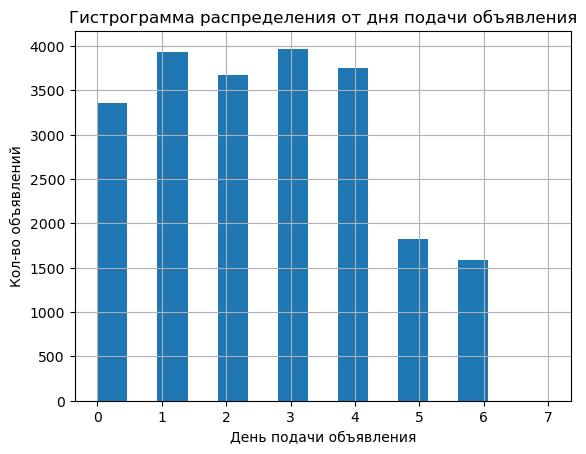

In [59]:
#построим гистрограмму зависимости от дня подачи объявления
data['weekday_exposition'].hist(bins=15, range=(0, 7))
plt.title('Гистрограмма распределения от дня подачи объявления')
plt.xlabel('День подачи объявления')
plt.ylabel('Кол-во объявлений')
plt.show();

В субботу и воскресенье в 2 раза реже опубликовывают объявления. 
В понедельник чуть меньше публикация по сравнению с будними днями.
В остальные дни примерно одинаковая картина.
Больше всего объявлений по вторникам и четвергам.

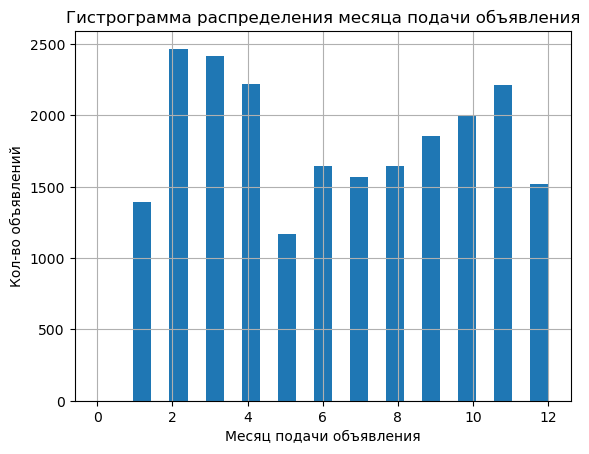

In [60]:
#построим гистрограмму зависимости от месяца подачи объявления
data['month_exposition'].hist(bins=25, range=(0, 12))
plt.title('Гистрограмма распределения месяца подачи объявления')
plt.xlabel('Месяц подачи объявления')
plt.ylabel('Кол-во объявлений')
plt.show();

Самый редко публикуемый месяц - май. (Перед летом никто не хочет продавать квартиру, все в ожидании тепла)
Самый часто публикуемый - февраль ( в  раза больше)
Публикации имеют волнообразный характер в зависимости от месяца.

Давайте начнем прямо с первого месяца - января:
В январе не высокая частота публикаций (все отмечают праздники и отходят от них). Потом в феврале идет резкий скачок, март апрель также напрыв, но немного снижается активность. Затем в мае резкий спад.
В летний период июнь-август  - средний уровень активности.

Затем постепенно предложения начинают увеличиваться осенью. С сентября видим каждый месяц прирост публикаций. Который снова падает в декабре ( все готовятся в новогодним праздникам и им не до продажи квартир).

Итак, мы закончили исследовать каждый параметр данных отдельно.
Теперь можно перейти к дальнешему анализу.  

### Скорость продажи квартир 

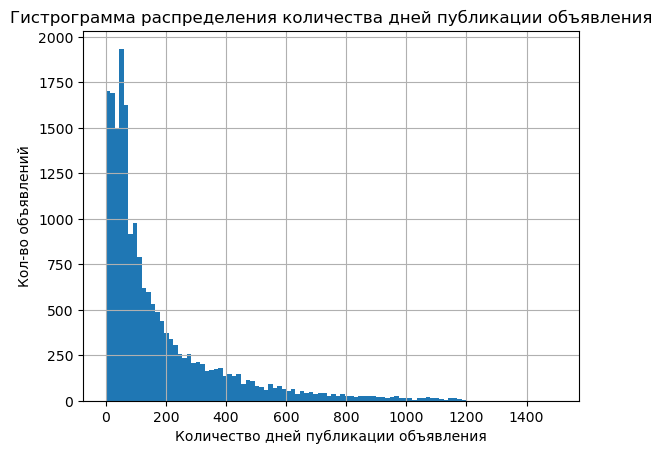

In [61]:
#построим гистрограмму зависимости количества проведенных дней в публикации у объявления
data['days_exposition'].hist(bins=100, range=(0, 1500))
plt.title('Гистрограмма распределения количества дней публикации объявления')
plt.xlabel('Количество дней публикации объявления')
plt.ylabel('Кол-во объявлений')
plt.show();

Гистограмма отображает распред Пуассона, хотя если присмотреться более внимательно, то можно увидеть несколько пиков.
Чтобы разобраться подробнее, надо построить более детальный график, где больше всего значений (до 200 дней). 

In [62]:
# проверим предельные показатели данных в количетсве дней публикации
data['days_exposition'].value_counts()

45.0      863
60.0      533
7.0       221
30.0      199
4.0       171
         ... 
1105.0      1
795.0       1
1089.0      1
651.0       1
971.0       1
Name: days_exposition, Length: 1037, dtype: int64

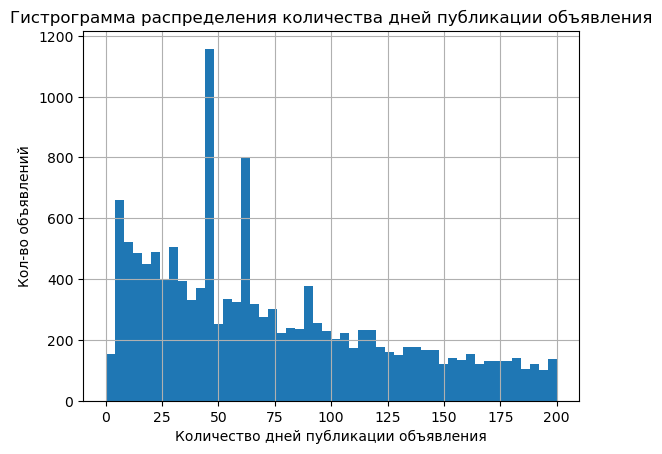

In [63]:
# укрепненный масштаб
data['days_exposition'].hist(bins=50, range=(0, 200))
plt.title('Гистрограмма распределения количества дней публикации объявления')
plt.xlabel('Количество дней публикации объявления')
plt.ylabel('Кол-во объявлений')
plt.show();

Хмм... Какие-то очень подозрительные выбивающиеся пики из плавного спада ( их 5, но 3 самых больших).
Определим, что это за значения:
7, 30, 45, 60, 90 - это количество дней, которе прошло с момента начала публикации до его снятия.
Если внимательно посмотреть, но это ровно неделя, месяц, 1,5 месяца, 2 месяца и 3 месяца.
На сайтах по продаже квартир часто объявляения снимаются как раз через промежутки, кратные месяцу. Его надо или продлевать или обновлять, или поставить галочку автоматического обновления.

Скорее всего эти пики и образовались в результат того, что публикация снимается с продажи, а продавец ее просто не обновляет. Я бы эти пики не брала в расчет, и нивелировала их. Поэтому будем считать эти значения аномально большими. Не беря в расчет эти значения график четко имеет плавный спад - чем дольше объявление висит на сайт, тем их меньше.

Пики этих значений искажают картину для анализа. Это замечание надо будет предоставить в отчет.

In [64]:
#вычислим среднее значение
print('Среднее значение дней публикации', data['days_exposition'].mean()) 

#вычислим медиану
print('Медианное значение дней публикации', data['days_exposition'].median()) 

Среднее значение дней публикации 171.26926469825125
Медианное значение дней публикации 92.0


Видно, что среднее значение в 2 раза больше медианы. Это может быть как раз связано с аномальными пиками. 
Так и выходит, что среднее из-за пиков увеличивается, хотя медианное значание остается более стабильным.

Поэтому я бы при анализе учитывала именно медианное значение.
Среднее время продажи квартиры получается составляет 3 месяца.

Поэтому продажи с длитеьлностью меньше 3 месяцев можно считать быстрыми.
Если продажа длится более 200 дней, то ее можно считать слишком долгой.

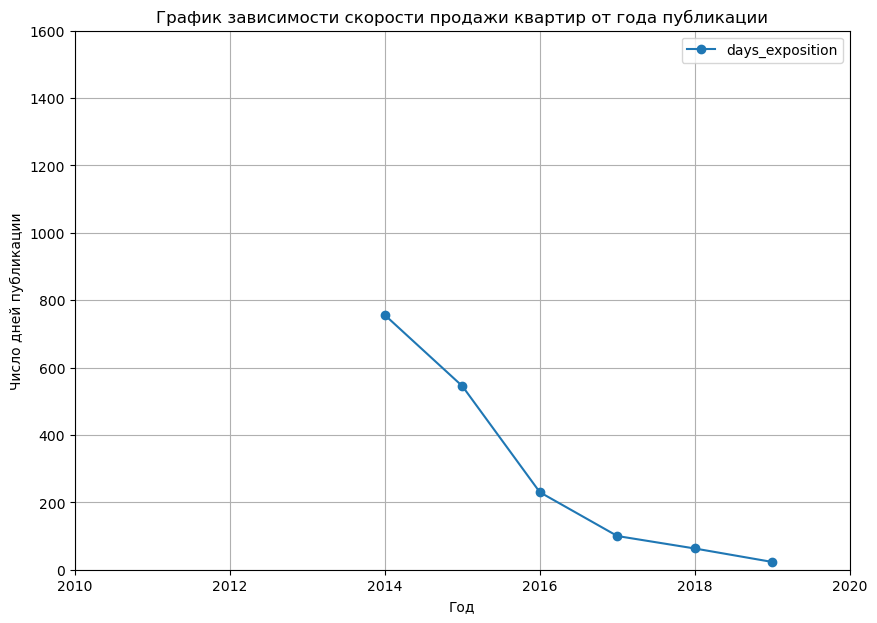

In [65]:
#построим график зависимости скорости продажи квартир от года публикации
(data.pivot_table(index='year_exposition', values='days_exposition', aggfunc='median')
.plot(grid=True, xlim=(2010, 2020), ylim=(0, 1600), figsize=(10,7), style='o-',))
plt.title('График зависимости скорости продажи квартир от года публикации')
plt.xlabel('Год')
plt.ylabel('Число дней публикации')
plt.show();

На графике видно, как показатель стремительно падает вниз. 
Т.е. с каждым годом все быстрее снимаются объявления с публикации.

Рассчитаем быстрые и слишком долгие продажи

In [66]:
# определим основные параметры days_exposition
data['days_exposition'].describe()

count    19271.000000
mean       171.269265
std        201.913075
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1199.000000
Name: days_exposition, dtype: float64

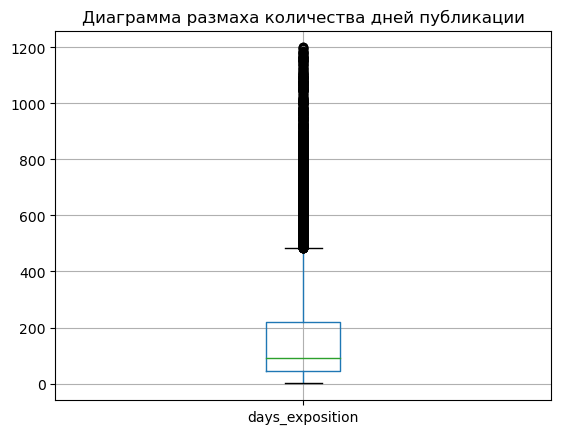

In [67]:
# построим диаграмму размаха по количеству дней публикации
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха количества дней публикации')
plt.show();

По графику и описанию показателей можно судить, что размах значений в пределах 44 (25%) - 220 (75%) дней.
Поэтому быстрыми продажами можно считать снятие с публикации менее через за 45 дней.
Слишком долгими - все что более 220 дней.

### Рассмотрим зависимость стоимости объекта от различных параметров из таблицы

In [68]:
#построим сводную таблицу
data_pivot = data.pivot_table(index='last_price',\
                              values=['total_area', 'living_area','kitchen_area', 'rooms', 'floor_type', \
                                      'weekday_exposition', 'month_exposition', 'year_exposition'])
data_pivot.head(10)

,kitchen_area,living_area,month_exposition,rooms,total_area,weekday_exposition,year_exposition
last_price,,,,,,,
430000.0,6.000,16.000000,5.000000,1.500000,42.200000,0.50,2018.500000
440000.0,NaN,NaN,7.000000,1.000000,40.000000,1.00,2018.000000
450000.0,6.600,23.533333,6.000000,1.750000,40.100000,2.25,2017.750000
470000.0,8.250,30.000000,3.666667,1.333333,40.833333,4.00,2018.000000
480000.0,NaN,16.000000,1.000000,1.000000,32.000000,6.00,2019.000000
490000.0,5.500,17.000000,8.500000,1.000000,34.550000,1.50,2016.500000
500000.0,7.800,21.033333,4.000000,1.250000,38.675000,2.00,2017.750000
520000.0,5.500,18.000000,9.000000,1.000000,30.000000,4.00,2017.000000
530000.0,5.800,16.000000,2.000000,1.000000,29.600000,2.00,2019.000000


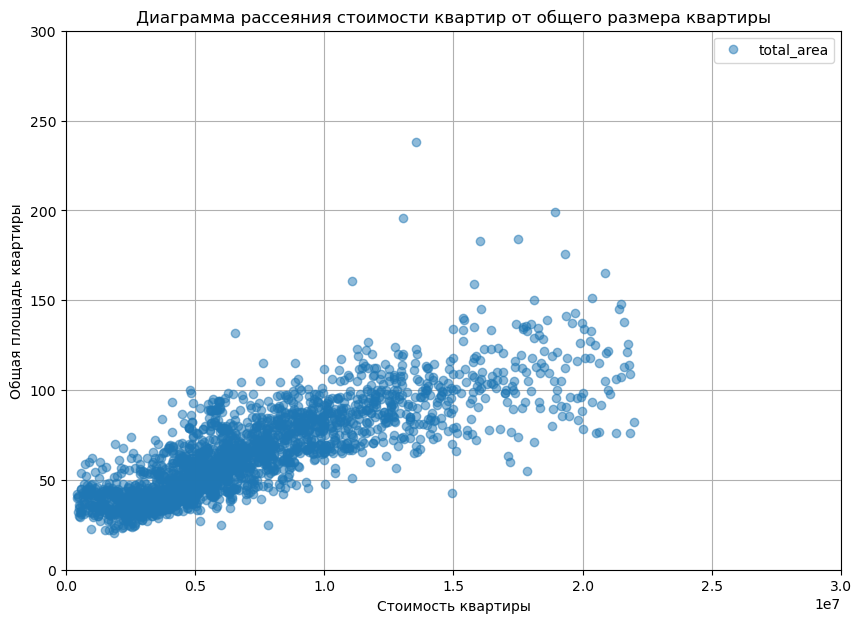

In [69]:
#строим график зависимости стоимости квартир от общего размера квартиры
(data.pivot_table(index='last_price', values='total_area', aggfunc='median')
.plot(grid=True, xlim=(0, 30000000), ylim=(0, 300), figsize=(10,7), style='o', alpha=0.5))
plt.title('Диаграмма рассеяния стоимости квартир от общего размера квартиры')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Общая площадь квартиры')
plt.show();

Видим четкую линейную зависимость - при увеличении общей площади стоимость объекта растет.
При этом ,чем ниже стоимость квариры, тем данная связь теснее. 
Если стоимость квартиры до 15 млн - связь четкая.
При увеличении стоимости > 15 млн, объектов для исследования становится меньше, но видно, что и рассеяние все больше.
Так что можно сделать вывод:
При стоимости квартиры до 15 млн р - имеется положит линейная зависимость цены квартиры от ее общей площади. 
если цена  > 15 млн р, то взаимосвязь есть, но становится менее ощутимой.

In [70]:
print(data['last_price'].corr(data['total_area']))
#коэффициент корреляции Пирсона равен 0,74 - имеется сильная положит линейная взаимосвязь.

0.7422169629064824


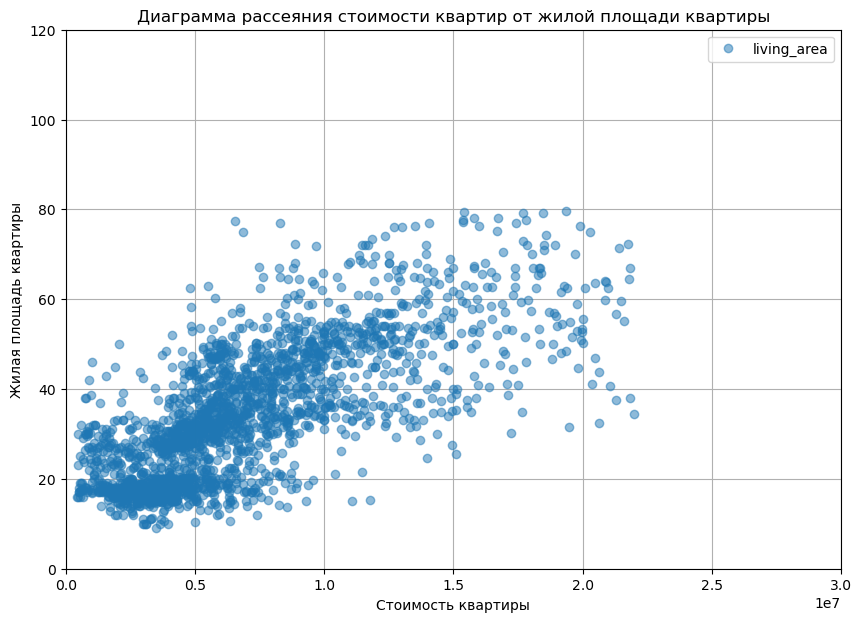

Коэффициент корреляции Пирсона 0.6179777127609635


In [71]:
#строим график зависимости стоимости квартир от жилой площади квартиры
(data.pivot_table(index='last_price', values='living_area', aggfunc='median')
.plot(grid=True, xlim=(0, 30000000), ylim=(0, 120), figsize=(10,7), style='o', alpha=0.5))
plt.title('Диаграмма рассеяния стоимости квартир от жилой площади квартиры')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Жилая площадь квартиры')
plt.show();

#расчет коэффициента корреляции Пирсона 
print('Коэффициент корреляции Пирсона', data['last_price'].corr(data['living_area']))

Можно сделать аналогичный вывод. Просто коэф корреляции чуть ниже (0.62).
Здесь также имеется положит линейная взаимосвязь - при увеличении жилой площади растет полная стоимость квартиры.
Линейная зависммость сильнее при меньших меньшей стоимости квартиры (до 15 млн р)

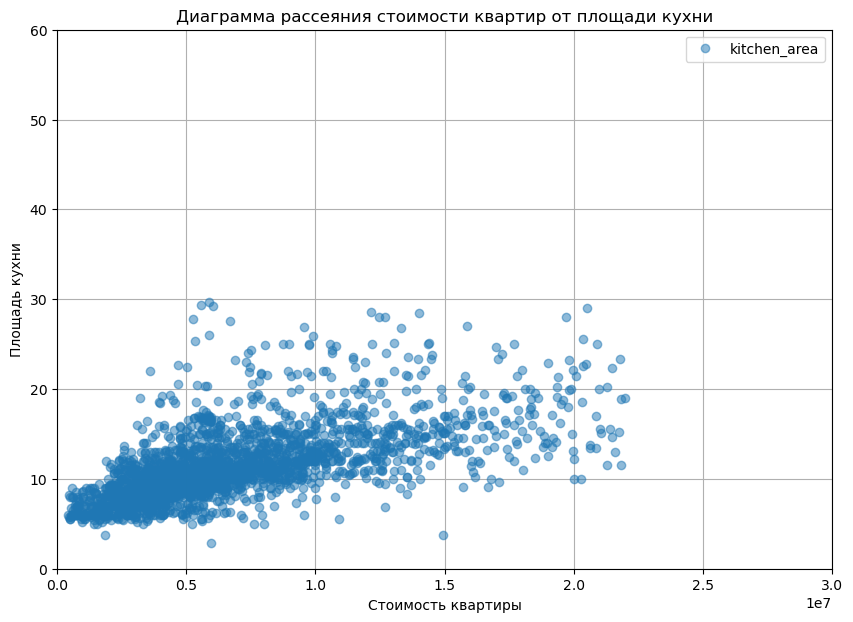

Коэффициент корреляции Пирсона 0.5482147771325387


In [72]:
#строим график зависимости стоимости квартир от площади кухни
(data.pivot_table(index='last_price', values='kitchen_area', aggfunc='median')
.plot(grid=True, xlim=(0, 30000000), ylim=(0, 60), figsize=(10,7), style='o', alpha=0.5))
plt.title('Диаграмма рассеяния стоимости квартир от площади кухни')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Площадь кухни')
plt.show();

#расчет коэффициента корреляции Пирсона 
print('Коэффициент корреляции Пирсона', data['last_price'].corr(data['kitchen_area']))

Также здесь идет положит линейная зависимость. Вывод аналогичен 2 предыдущим графикам:
при увеличении площади кухни растет полная стоимость квартиры.
Линейная зависммость сильнее при меньших меньшей стоимости квартиры (до 15 млн р ).
Единсвенное - коэффициент корреляции стал еще меньше -  0.55, значит связь ослабевает.

Все 3 графика схожи между собой. 
По ним можно сделать единый вывод - имеется положит линейная связь в зависимости об стоимости квартиры.
Самая сильная взаимосвязь от общей площади квартиры. Для жилой площади она ослабевает и еще меньше становится при зависимости от площади кухни.

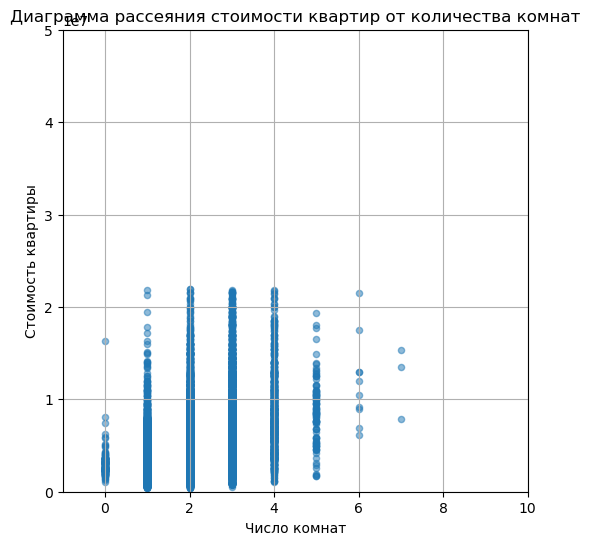

In [73]:
#строим график зависимости стоимости квартир от количества комнат
(data.plot(x='rooms', y='last_price', kind='scatter', \
           grid=True, figsize=(6,6), alpha=0.5, xlim=(-1, 10), ylim=(0, 50000000)))
plt.title('Диаграмма рассеяния стоимости квартир от количества комнат')
plt.xlabel('Число комнат')
plt.ylabel('Стоимость квартиры')
plt.show();

При построении графика зависимости цены от кол-ва комнат лучше строить диаграмму рассеяния, она более точно распределит по каждому значению показатели.
Видим, что при увеличении комнат от 1 до 4 - идет четкий рост с увеличением цены, т.е. чем больше комнат в квартире, тем дороже ее естоимость.
Если кол-во комнат 3 - максимум стоимости объекта.
Далее при увеличении числа комнат (4-7) идет спад по цене. 
Это скорее всего связано с тем, что жилье в многоквартирном доме (4-7) - коммунальное или это бывшее общежитие, года постройки домов старые и стоимость на них дешевле нежели 2-3 комнатные.

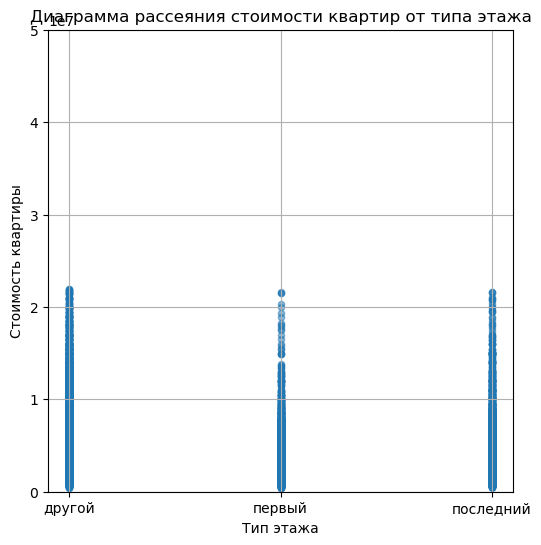

In [74]:
#строим график зависимости стоимости квартир от типа этажа
(data.plot(x='floor_type', y='last_price', kind='scatter', \
           grid=True, figsize=(6,6), alpha=0.5, ylim=(0, 50000000)))
plt.title('Диаграмма рассеяния стоимости квартир от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартиры')
plt.show();

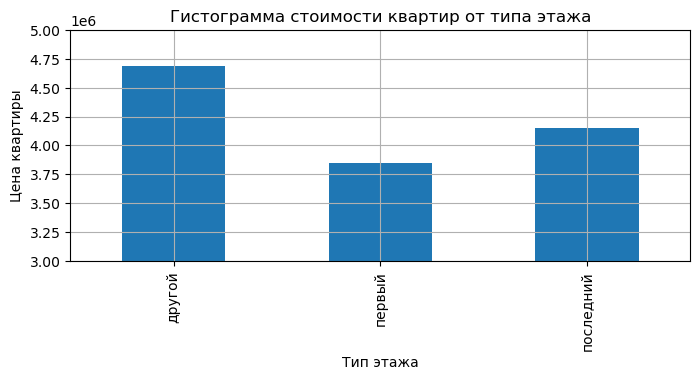

In [75]:
#посчитаем медианные значения для каждого типа этажа

data.groupby('floor_type')['last_price'].median()\
.plot(grid=True, figsize=(8, 3), style='o-', kind='bar', ylim=(3000000, 5000000))
plt.title('Гистограмма стоимости квартир от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры')
plt.show();

По графику видно, что самая низкая цена - у объявлений 1-ого этажа. 
Чуть выше идет стоимость объекта последних этажей.
И самые дорогостоящие объекты принадлежат типу этажа "другое".

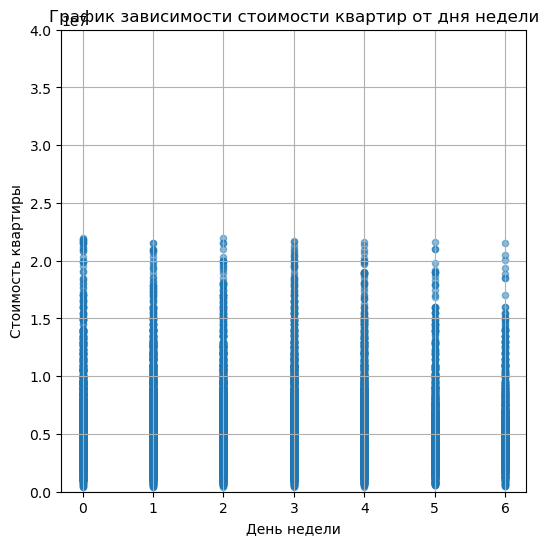

In [76]:
#строим график зависимости стоимости квартир от дня недели
(data.plot(x='weekday_exposition', y='last_price', kind='scatter', \
           grid=True, figsize=(6,6), alpha=0.5, ylim=(0, 40000000)))
plt.title('График зависимости стоимости квартир от дня недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры')
plt.show();

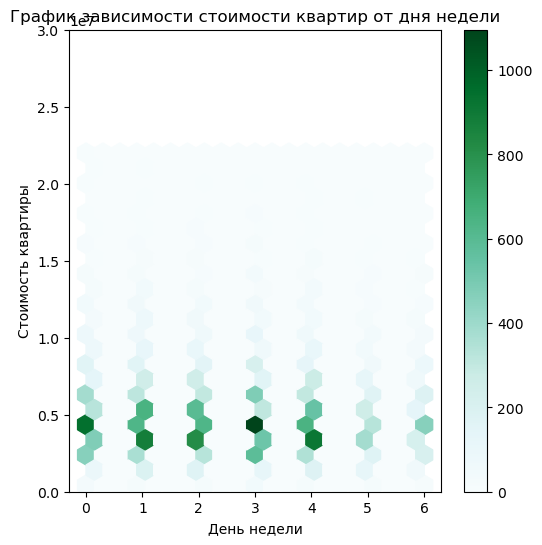

In [77]:
#2 способ визуализации
#строим график зависимости стоимости квартир от дня недели
(data.plot(x='weekday_exposition', y='last_price', kind='hexbin', \
           gridsize=20, figsize=(6,6), sharex=False, ylim=(0, 30000000)))
plt.title('График зависимости стоимости квартир от дня недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры')
plt.show();

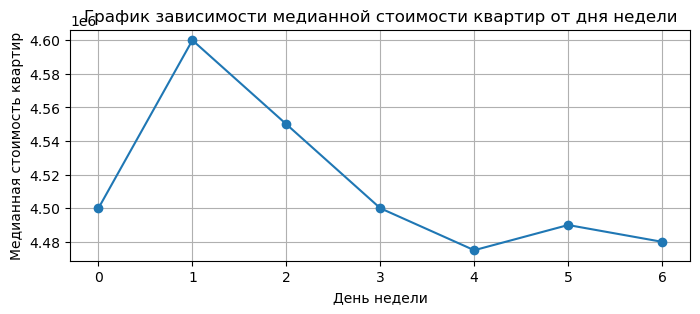

In [78]:
# 3 тип рассмотрения
##посчитаем медианные значения для каждого дня недели и отобразим эти значения на графике
data.groupby('weekday_exposition')['last_price'].median()\
.plot(grid=True, figsize=(8, 3), style='o-')
plt.title('График зависимости медианной стоимости квартир от дня недели')
plt.xlabel('День недели')
plt.ylabel('Медианная стоимость квартир')
plt.show();

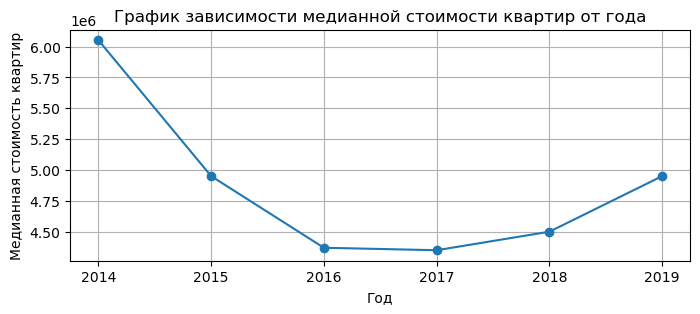

In [79]:
# 3 тип рассмотрения
##посчитаем медианные значения для каждого года и отобразим эти значения на графике
data.groupby('year_exposition')['last_price'].median()\
.plot(grid=True, figsize=(8, 3), style='o-')
plt.title('График зависимости медианной стоимости квартир от года')
plt.xlabel('Год')
plt.ylabel('Медианная стоимость квартир')
plt.show();

2 вид гистограммы более отчетливо показывает в какие дни попадаются более дорогие квартиры - это вторник и четверг.
В остальные будние дни совсем небольшой спад имеется. А вот в выходные стоимость не высока.
На самом деле это тесно связано с количеством публикуемых объевлений. Там абсолютна такая же тенденция видна. 
И в связи с этим в какие-то дни выше стоимость. а в какие-то она ниже.

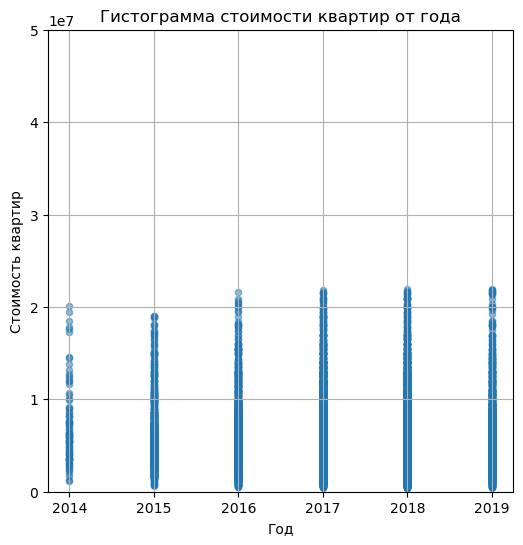

In [80]:
#строим график зависимости стоимости квартир от года
(data.plot(x='year_exposition', y='last_price', kind='scatter', \
           grid=True, figsize=(6,6), alpha=0.5, ylim=(0, 50000000)))
plt.title('Гистограмма стоимости квартир от года')
plt.xlabel('Год')
plt.ylabel('Стоимость квартир')
plt.show();

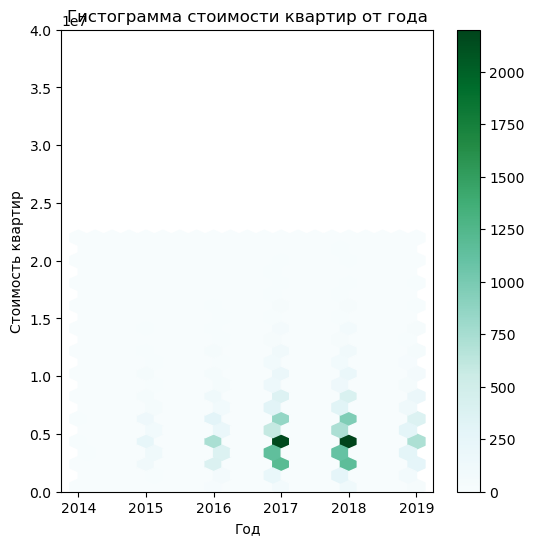

In [81]:
#строим график зависимости стоимости квартир от года
(data.plot(x='year_exposition', y='last_price', kind='hexbin', \
           gridsize=20, figsize=(6,6), sharex=False, ylim=(0, 40000000)))
plt.title('Гистограмма стоимости квартир от года')
plt.xlabel('Год')
plt.ylabel('Стоимость квартир')
plt.show();

Здесь также построим 2 гистограммы, чтобы более точно определить как обстоят дела.
Видно, что в 2017 и 2018 года выставлялись самые дорогие по стоимости объекты. 
с 2014 года цена объекта постепенно росла вверх. достигла максимумов в 2017 -2018 годах.
Затем в 2019 году пошел спал по цене снова.

Во влиянии года публикации от различных факторов лучше разобраться более подробно.

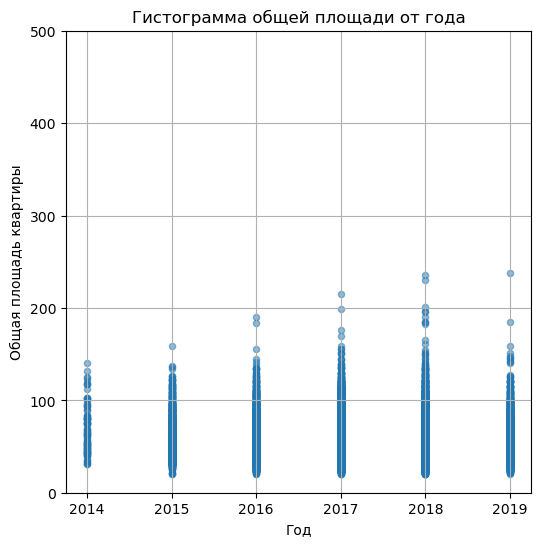

In [82]:
#строим график зависимости общей площади от года
(data.plot(x='year_exposition', y='total_area', kind='scatter', \
           grid=True, figsize=(6,6), alpha=0.5, ylim=(0, 500)))
plt.title('Гистограмма общей площади от года')
plt.xlabel('Год')
plt.ylabel('Общая площадь квартиры')
plt.show();

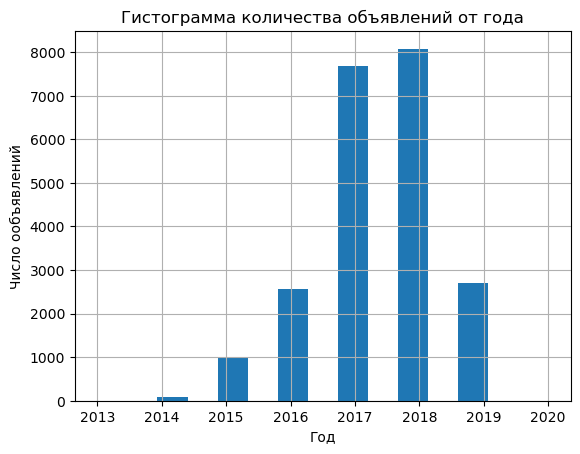

In [83]:
#строим график зависимости числа объявлений от года
data['year_exposition'].hist(bins=15, range=(2013, 2020))
plt.title('Гистограмма количества объявлений от года')
plt.xlabel('Год')
plt.ylabel('Число ообъявлений')
plt.show();

Теперь стало более понятно почему выделялись именно 2 года - 2017 и 2018.
За всех 3 графиках видна одинаковая зависимость, что:
- Начиная с 2014-2016 года каждый год росли - кол-во объявлений, жилая площадь каждого объявления 
и вместе с ней и общая стоимость продажи квартиры.

- 2017 год стал пиковым по всем 3 параметрам.

- В 2018 году немного спал рынок, но недалеко ушел от 2017, 
а вот в 2019 году пошел резкий спал снова всех 3-х показателей.

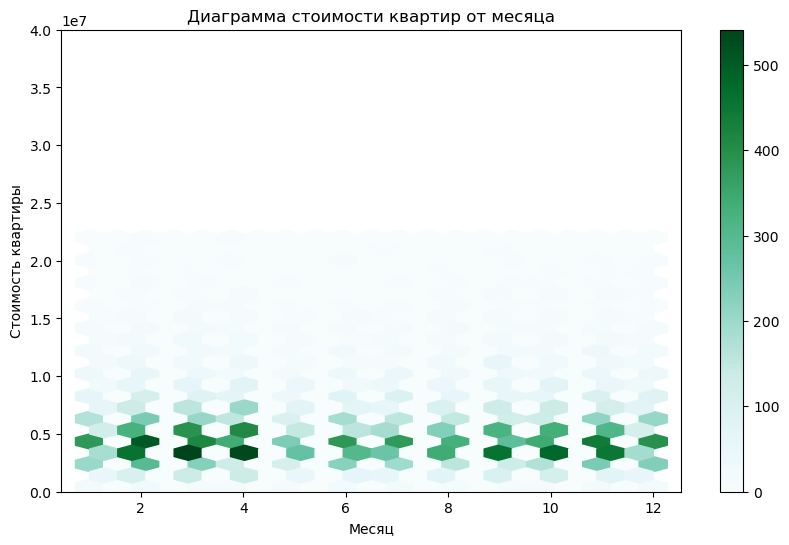

In [84]:
#строим график зависимости стоимости квартир от месяца
(data.plot(x='month_exposition', y='last_price', kind='hexbin', \
           gridsize=20, figsize=(10,6), sharex=False, ylim=(0, 40000000)))
plt.title('Диаграмма стоимости квартир от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры')
plt.show();

In [85]:
#посчитаем медианные значения для каждого месяца года
data.groupby('month_exposition')['last_price'].median()

month_exposition
1     4500000.0
2     4500000.0
3     4500000.0
4     4650000.0
5     4400000.0
6     4300000.0
7     4450000.0
8     4500000.0
9     4580000.0
10    4500000.0
11    4540000.0
12    4550000.0
Name: last_price, dtype: float64

Самые "дорогие" месяцы - февраль, март. Следом идут апрель и ноябрь.
В мае - минимальные по стоимости объекты в продаже.
На этой гистограмме я также вижу идентичную картину с распредением количества объектов по месяцам.
Таким образом можно сделать вывод:
Чем бОльшее число самих объявлений, тем выше вероятность того что эти объявления будут дороже.

### ТОП-10 населенных пунктов

In [86]:
#выведем на экран 10 самых часто встречающихся в объявлениях населенных пункта
data_new_name = data['locality_name'].value_counts().head(10)
print(data_new_name)

санкт-петербург      14325
поселок мурино         544
поселок шушары         434
всеволожск             389
пушкин                 341
колпино                334
поселок парголово      318
гатчина                301
поселок кудрово        298
выборг                 229
Name: locality_name, dtype: int64


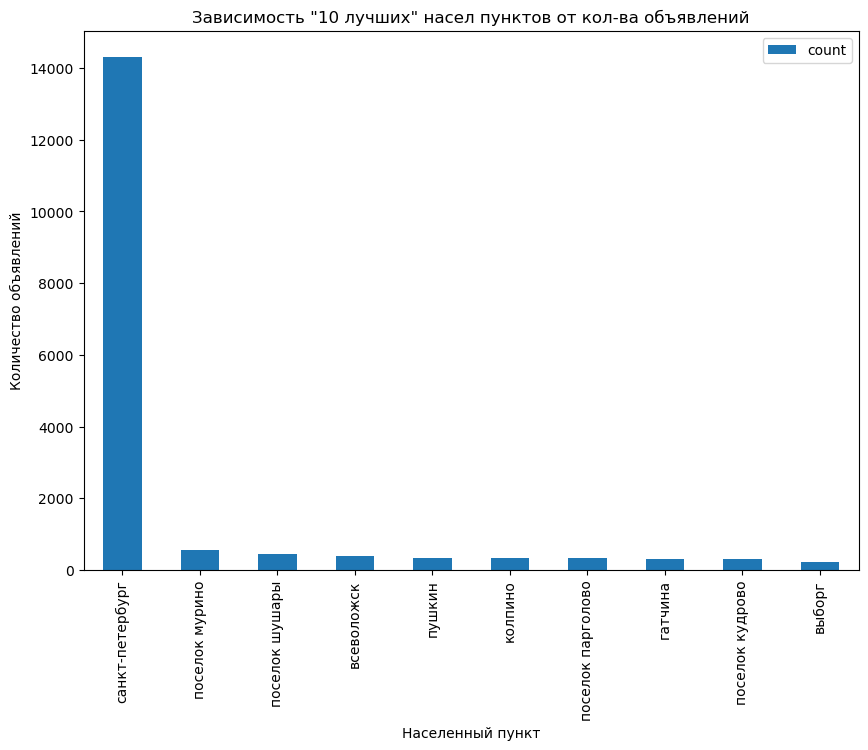

In [87]:
#сгруппируем по насел пунктам и посчитаем кол-во для каждого из них. 
#Вместе с этим сразу же построим график их зависимости

data.groupby(by='locality_name')[['locality_name']].agg(count=('locality_name', 'count')).\
    reset_index().sort_values(by='count', ascending=False).head(10).\
        plot(kind='bar', x='locality_name', y='count', figsize=(10,7), \
             title='Зависимость "10 лучших" насел пунктов от кол-ва объявлений')
plt.xlabel('Населенный пункт')
plt.ylabel('Количество объявлений')
plt.show();

In [88]:
#сделаем срез датафрейма по необходимым условиям в столбце locality_name и присвоим ему переменную good
good = data.query('locality_name in @data_new_name.index')

#проверка уникальных значений населенных пунктов
print(good['locality_name'].unique())

good_pivot = good.pivot_table(index='locality_name', values='price_one_m2', aggfunc=['mean', 'min', 'max'])
display(good_pivot)

#проверим полученные значения другим путем
display(data.query('locality_name == "санкт-петербург"')['price_one_m2'].mean())


#если min и max нужно найти из средних значений, тогда следующее решение, 
#где мы сортируем полученную таблицу по возрастанию.
good2 = good.pivot_table(index='locality_name', values='price_one_m2', aggfunc='mean')
good2['price_one_m2'] = round(good2['price_one_m2'])

good2.sort_values(by='price_one_m2')

['санкт-петербург' 'поселок шушары' 'поселок парголово' 'поселок мурино'
 'пушкин' 'поселок кудрово' 'колпино' 'гатчина' 'выборг' 'всеволожск']


,mean,min,max
,price_one_m2,price_one_m2,price_one_m2
locality_name,,,
всеволожск,67040.017995,31400,136423
выборг,57908.903930,18750,94805
гатчина,68605.451827,10507,146315
колпино,75445.308383,47957,125000
поселок кудрово,92541.788591,54160,142857
поселок мурино,85590.775735,50000,138580
поселок парголово,90037.783019,39205,138522
поселок шушары,78589.838710,47700,147826


108816.62904013961

,price_one_m2
locality_name,
выборг,57909.0
всеволожск,67040.0
гатчина,68605.0
колпино,75445.0
поселок шушары,78590.0
поселок мурино,85591.0
поселок парголово,90038.0
поселок кудрово,92542.0
пушкин,101546.0


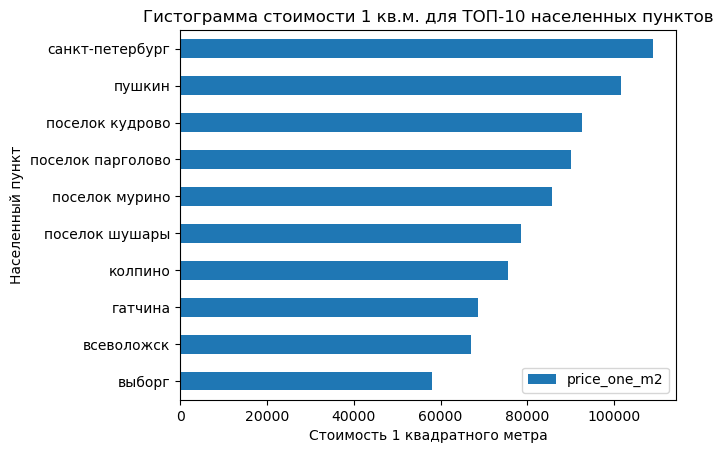

In [89]:
# построим гистограмму стоимости 1 кв.м. для ТОП-10 населенных пунктов
good2.sort_values(by='price_one_m2').plot(kind='barh')
plt.title('Гистограмма стоимости 1 кв.м. для ТОП-10 населенных пунктов')
plt.xlabel('Стоимость 1 квадратного метра')
plt.ylabel('Населенный пункт')
plt.show();

Итак, мы получили таблицу с необходимыми для нас данными.
Из таблицы видно, что Выборгу принадлежат и минимальное значение (57909), и Санкт-Петербургу максимальное (108817). 
Но это можно объяснить тем, что это  СПб самый крупный город-миллионник,в котором цена будет самая высокая. А Выборг, наоборот, находится от СПб дальше всех, поэтому цена кв м будет там ниже.

По медианным значениям стоимости квадратного метра:
- min стоимость - принадлежит Выборгу
- max стоимость - СПб

### Средняя цена каждого км в СПб

In [90]:
#сделаем срез только по санкт-петербургу и добавим его в новую переменную
data_spb = data.query('locality_name == "санкт-петербург"')

#добавим новый столбец равный отношению last_price / city_centr_km, т.е. цена квартиры на 1 км.
data_spb['price_1km'] = data_spb['last_price'] / data_spb['city_centr_km']
print(data_spb['price_1km'].head(10))

print()
#выведем на экран медианное значение стоимости квартиры на каждый км
print('Медианная стоимость на каждый километр в СПб', data_spb['price_1km'].median())


0     8.125000e+05
2     3.711429e+05
7     6.595833e+05
9     3.600000e+05
10    3.607143e+05
15    3.321429e+05
16    6.090909e+05
17    2.786667e+05
18    2.954545e+05
19    1.092308e+06
Name: price_1km, dtype: float64

Медианная стоимость на каждый километр в СПб 423076.92307692306


C:\Users\Irina\AppData\Local\Temp\ipykernel_7804\3343720767.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['price_1km'] = data_spb['last_price'] / data_spb['city_centr_km']


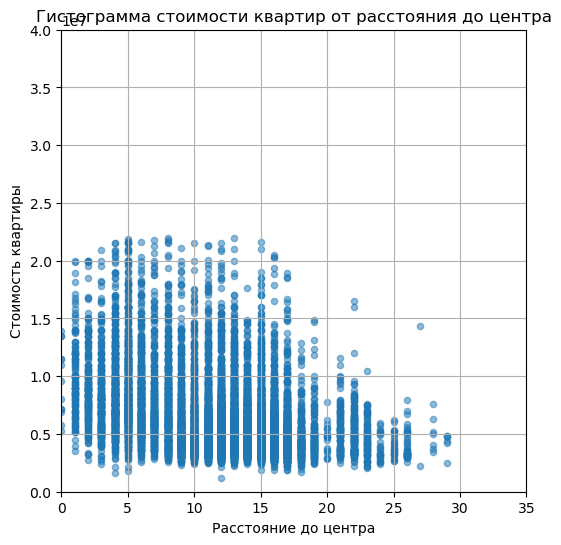

In [91]:
#строим график зависимости стоимости квартир от расстояния до центра
(data_spb.plot(x='city_centr_km', y='last_price', kind='scatter', \
               grid=True, alpha=0.5, xlim=(0, 35), ylim=(0, 40000000), figsize=(6,6)))
plt.title('Гистограмма стоимости квартир от расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Стоимость квартиры')
plt.show();

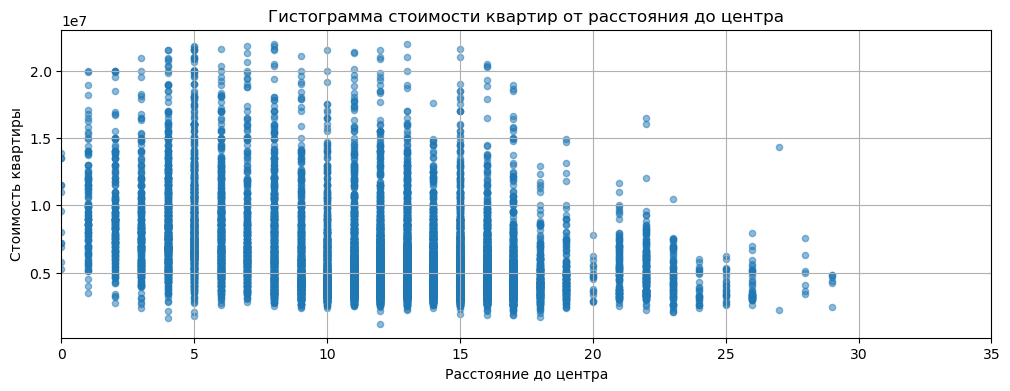

In [92]:
#строим график зависимости стоимости квартир от расстояния до центра
(data_spb.plot(x='city_centr_km', y='last_price', kind='scatter', grid=True, alpha=0.5, xlim=(0, 35), figsize=(12,4)))
plt.title('Гистограмма стоимости квартир от расстояния до центра')
plt.xlabel('Расстояние до центра')
plt.ylabel('Стоимость квартиры')
plt.show();

Стоимость квартир растет при расстояни от 0 до 5 км. 
5 км - максимальная стоимость квартир при такой отдаленности от центра.
5 км - самое оптимальное расположение, вроде и не в самом центре живешь, но до любой точки центра можно быстро и легко добраться.
При увеличении расстояния от центра от 5 км и далее ( до 30 км) идет плавный спад и стоимость квартир падает в цене,
т.е. чем дальше от центра, там дешевле можно приобрести жилье.

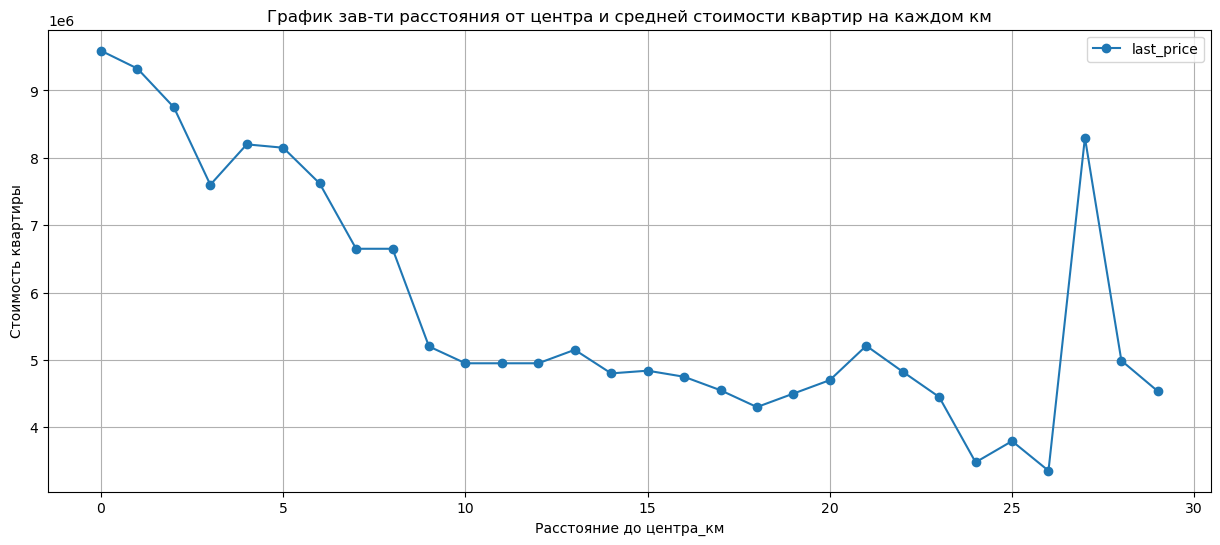

In [93]:
#строим график зависимости расстояния от центра и средней стоимости квартир на каждом км
data_spb.pivot_table(index='city_centr_km', values='last_price',aggfunc='median')\
.plot(grid=True, figsize=(15, 6), style='o-')
plt.title('График зав-ти расстояния от центра и средней стоимости квартир на каждом км')
plt.ylabel('Стоимость квартиры')
plt.xlabel('Расстояние до центра_км')
plt.show();

Если брать усредненно, то видим, что в самом центре стоимость квартир самая высокая, 
далее при удалении от центра стоимость картир постепенно снижается.
Но есть явный провал на расстоянии 3 км от центра, подъем на 5 км и пик на 27 км 
        (скорее всего какой-то элитный пригород Пушкин).

Разберем подробнее, что за выброс на расстоянии 27 км.

In [94]:
# выделим объекты в спб на расстоянии от центра 27 км 
data_spb.query('city_centr_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,weekday_exposition,year_exposition,month_exposition,price_one_m2,floor_type,city_centr_km,price_1km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,NaN,...,0.0,NaN,128.0,1,2017,11,193918,другой,27.0,531481.481481
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,NaN,...,0.0,NaN,178.0,1,2018,2,70312,последний,27.0,83333.333333


На 27 км всего лишь 2 объекта в продаже, просмотрев внимательнее параметры этих квартир, видно. что 1 объект стоимостью 14 млн р, 
второй - 2,5.
Объект с Большей стоимостью (аномалия) как раз и дает этот резкий скачок в измерениях.

Посмотреть подробнее на количество квартир по типу этажа, которые продаются на 3-м км. и 5-ом, чтобы объяснить пик  и провал в центре.

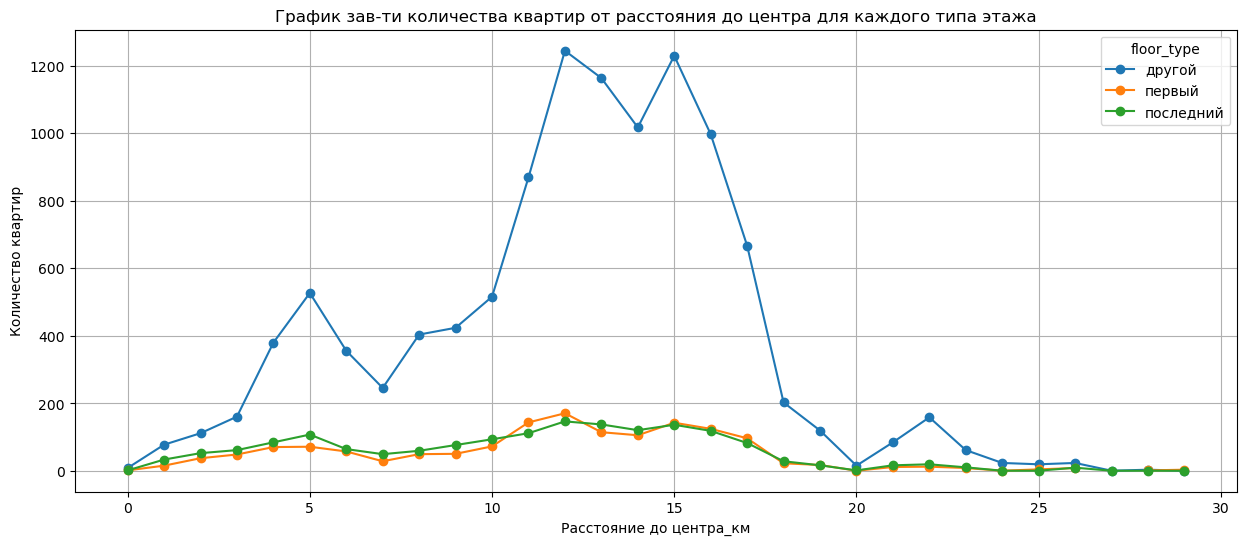

In [95]:
# строим графики зависимости количества квартир от расстояния до центра для каждого типа этажа
data_spb.pivot_table(index='city_centr_km', columns='floor_type', aggfunc='count')['total_area']\
.plot(grid=True, figsize=(15, 6), style='o-')
plt.title('График зав-ти количества квартир от расстояния до центра для каждого типа этажа')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до центра_км')
plt.show();

Как видно из графика, на 3-ем км был больший процент квартир с первого этажа. На 5 км - резкий скачок для квартир этажности типа "другой" - поэтому появился резкий скачок средней цены квартиры.

### Общий вывод

Итак, мы полноценно провели исследование по продающимся квартирам в СПб и его пригородах.
На первоначальном этапе мы определили пропуски по всему датафрейму, заменили значения пропусков где это было возможно, часть пропусков оставили, поскольку они не мешали проводит нам анализ, но эти строки нужны были для более точного исследования.
Дубликатов не было обнаружено, но мы удалили выбивающиеся аномальные значения по большинству столбцов - по количеству комнат, этажности квартир и высоте потолков, также были исправлены неявные дубликаты в названиях населенных пунктов и были приведены к более лаконичному виду.
Провели замену некоторых типов данных и округлили значения там, где это было необходимо.

1. Общая площадь квартир:
- Максимум площади приходится на площадь примерно 50-60 кв м. и это около 5000 квартир(22% от всех квартир). 
- Основная масса квартир находится в диапозоне 20-100 кв. м.
- Квартиры продаются с общей площадью от 20 кв. м.
При увеличении площади квартиры плавно уменьшается количество публикуемых объявлений.

2. Жилая площадь объектов:
имеется 2 пиковых значения в промежутке 10-50 кв м.
Минимум между двумя пиками -  находится при жилой площади примерно 25 кв. м. Скорее всего это евро-планировки, где кухня и жилая зона объеденены в одно пространство, и учитываются лишь в площади кухни, а жилая за счет этого резко снижаемся.
1 пик - около 20 кв м. - студии, которые не могут быть в принципе без жилой + в продаже чаще встречаются квартиры меньшей площади (студии и однушки).
2 пик - около 35 кв м   - свойственно для двухкомнатных квартирах. Видно, что их чуть меньше, но средний пик все же отмечается.
Основная масса квартир состредоточена в промежутке 20-50 кв. м жилой площади.

3. Площадь кухни:
Основная площадь кухонь варируется в пределах от 5 до 20 кв м. В этом диапазоне прослеживается 3 пика:
1 пик - значение 5,5-6 кв м. - старые панельки 9 этажные.
2 пик - значение 8-9 кв м - их самое большое количество (корабли, панельки, общежития из кирпича, старый фонд).
3 пик - значение 10-11 кв м. (слвременные постройки).
При  площади кухни от 11 кв м видна плавная зависимость - чем больше площадь, тем меньше количество объявлений.

4. Стоимость квартир:
Основная масса стоимости на квартиры - в диапазоне от 2 до 8 млн р.
Максимум (около 4 млн р.) -  это средняя стоимость студий и однушек.

5. Число комнат:
Чаще всего продаются 1-, 2- и 3-комнатные. Больше всего продаются однокомнатные и двухкомнатные, примерно одинаково по 8000 объявлений (по 36% каждый). Трехкомнатные также продаются, но чуть меньше (5000 квартир - 20%). Остальных вариантов квартир мало и они не превышают 1000 объявлений.

6. Высота потолков:
Пик на значениях - 2,6-2,7 м (почти 12 000 объявлений - это 50% от общего числа). 
Далее идет резкий спад от числа объявлений кроме 1  всплеск на значениях 3,0-3,2 м. (около 1000). Что присуще высоте потолков  старого фонда.

7. Этаж квартиры:
Чем выше этаж квартиры, тем меньше объявлений.
Самое большое количество объявлений на 2 этаже - их около 3300 (7 % от общего числа обявлений).
с 1 по 5 этажи - от 2500 до 3300. начиная с 5 этажа кол-во объявлений резко падает в 2 раза и их уже не больше 1300. Далее идет постепенный спад до 9 этажа. И начиная с 10 этажа число объявлений не превышает 600.

8. Тип этажа:
Первый этаж  выставляется в продажу реже всего, и цена на него самая дешевая.
Чуть больше продаж на последнем этаже.
Основной костяк объявлений (больше 16000 - это более чем 72% от общего числа) 

9. Этажность квартир:
Есть четкие пики на значениях: 5, 9, 12, 16 и 25 этажей.
основная застройка домов - 5 и 9 этажные.
 5-этажные - 5700 объявлений (25% четверть всех объявлений!)
9-этажные -  3700 (16%) объявлений. 
С большей высотностью дома объявлений в разы меньше - от 1000 до 1300 (вместе дают те же 15%).

10. Расстояние до центра города:
В основном объявления в промежутке от 0 до 20 км.
1 пик - 5000 м от центра (600 объявлений) 2 и 3 пик - 12 и 15 км от центра (по 1000 объявл).

11. Расстояние до парков.
Парков в Питере и окрестностях много, они рассредоточены по всей территории. Поэтому зачастую квартира находится в недалекой близости от парка - пик на расстоянии 500 м от парка.

Дополнит особенности:
Больше всего объявлений по вторникам и четвергам.
В выходные дни (суббота и воскресенье) реже всего выставляют объявления (в 2 раза реже).

Самый редко публикуемый месяц - май. (Перед летом никто не хочет продавать квартиру, все в ожидании тепла).
Самые активные продажи в феврале, марте и ноябре. Публикации имеют волнообразный характер в зависимости от месяца.

Есть пики по количеству дней выставленных публикациях: 7, 30, 45, 60, 90 - это количество дней, которое прошло с момента начала публикации до его снятия. Если внимательно посмотреть, но это ровно неделя, месяц, 1,5 месяца, 2 месяца и 3 месяца. Публикация снимается с продажи, а продавец ее просто не обновляет.
Пики этих значений искажают картину для анализа, на что требует обратить внимание.

С каждым годом все быстрее снимаются объявления с публикации ( исследуем 2014 - 2019 года)

Быстрыми продажами можно считать снятие с публикации менее через за 45 дней. Слишком долгими - все что более 220 дней.

При стоимости квартиры до 15 млн р - имеется положит линейная зависимость цены квартиры от ее общей площади. если цена > 15 млн р, то связь становится менее ощутимой.

Имеется положит линейная связь в зависимости об стоимости квартиры. Самая сильная взаимосвязь от общей площади квартиры. Для жилой площади она ослабевает и еще меньше становится при зависимости от площади кухни.

В 2017 и 2018 года выставлялись самые дорогие по стоимости объекты. с 2014 года цена объекта постепенно росла вверх. достигла максимумов в 2017 -2018 годах. Затем в 2019 году пошел спал по цене снова.
Начиная с 2014-2016 года каждый год росли - кол-во объявлений, жилая площадь каждого объявления и вместе с ней и общая стоимость продажи квартиры.
2017 год стал пиковым по всех 3 параметрам.
В 2018 году немного спал рынок, но недалеко ушел от 2017, а вот в 2019 году пошел резкий спал снова всех 3-х показателей.

По медианным значениям стоимости квадратного метра: min стоимость - принадлежит Выборгу max стоимость - СПб

В самом центре стоимость квартир самая высокая, далее при удалении от центра стоимость картир постепенно снижается. Но есть явный провал на расстоянии 3 км от центра (много квартир на 1 этаже), подъем на 5 км (скачок квартир этажности "другое").